<font size="+3.8">Foxf2 Expression per Cell Type</font>  
<font size="+1.5"></font>  

Aim: Combine and plot Foxf2 expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
from datetime import date
date.today().strftime('%d/%m/%Y')

'05/02/2024'

In [2]:
import os
os.getlogin()

'sfrerich'

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from matplotlib.pyplot import rc_context
import seaborn as sns
import platform

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\3750274239.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import fnmatch

In [5]:
os.environ['CONDA_DEFAULT_ENV'] # conda env

'scanpy'

In [6]:
platform.platform()

'Windows-10-10.0.14393-SP0'

In [7]:
sc.settings.verbosity = 3

In [13]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win
#main_dir='/Volumes/BD-Dichgans/SF'

# Foxf2

In [14]:
gene="Foxf2"

## Load data

In [83]:
path = main_dir+'//P06_Foxf2_per_celltype//Foxf2_summarized' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230228_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230228_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230228_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230301_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230302_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230302_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P06_Foxf2_per_celltype//Foxf2_summarized\\20230310_TabulaMuris2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muench

In [84]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [85]:
all

clusters  mean_expression  fraction_of_cells   gene  \
0             ECs         0.291276           0.107273  FOXF2   
1     Fibroblasts         0.403376           0.153991  FOXF2   
2   Fibromyocytes         0.033961           0.021365  FOXF2   
3       Pericytes         1.000000           0.355623  FOXF2   
4            SMCs         0.000000           0.010474  FOXF2   
..            ...              ...                ...    ...   
77            ECs         1.000000           0.752618  Foxf2   
78    Fibroblasts         0.293552           0.476744  Foxf2   
79         Oligos         0.000000           0.025806  Foxf2   
80      Pericytes         0.853845           0.585478  Foxf2   
81           SMCs         0.247018           0.340067  Foxf2   

               source organism  cell_number  
0         Winkler2022    Human         4950  
1         Winkler2022    Human         3721  
2         Winkler2022    Human         4353  
3         Winkler2022    Human          329  
4         Winkler2022    Human        41150  
..                ...      ...          ...  
77  Vanlandewijck2018    Mouse         1528  
78  Vanlandewijck2018    Mouse           86  
79  Vanlandewijck2018    Mouse          155  
80  Vanlandewijck2018    Mouse         1088  
81  Vanlandewijck2018    Mouse          297  

[82 rows x 7 columns]

In [86]:
all.gene.unique()

array(['FOXF2', 'Foxf2'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [87]:
all.clusters.value_counts()

clusters
SMCs                               9
Pericytes                          8
Astrocytes                         8
Oligos                             8
Neurons                            7
OPCs                               6
Fibroblasts                        6
Microglia/Macrophages              5
Endothelial cells                  5
ECs                                4
Ependymal cells                    4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
Leptomeningeal cells               1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Name: count, dtype: int64

In [88]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Yang2022                    1                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Yang2022                           0                1            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Yang2022                       0             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Yang2022                     0          0                      1            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Yang2022                      0        1     1     

In [89]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [90]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [91]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [92]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [93]:
all = all.replace("Microglia","Microglia/Mφ")

In [94]:
all = all.replace("Macrophages","Microglia/Mφ")

In [95]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [96]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [97]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [98]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [99]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [100]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [101]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [102]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [103]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
11  Neuroblasts/NSCs         0.000000           0.000000  Foxf2    Zeisel2018   
33  Neuroblasts/NSCs         0.001688           0.000499  Foxf2  Saunders2018   

   organism  cell_number  
11    Mouse         5466  
33    Mouse         4008

### Rename ECs

In [104]:
# rename ECs to Endothelial cells

In [105]:
all2 = all

In [106]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [107]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [108]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [109]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [110]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [111]:
all2 = all2.sort_values("clusters")

### Rename studies

In [112]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\1771013750.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")


In [113]:
all2 = all2.replace("Heindl2022","Own data")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\3687310255.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Heindl2022","Own data")


In [114]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\1475316203.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")


In [115]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\1585791903.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")


In [116]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\3821603520.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")


In [117]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\713763838.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Yang2022", "Yang, 2022, Nature")


In [118]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\2713112613.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")


In [119]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\1775968949.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")


In [120]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\1930536221.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")


In [121]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [122]:
all2

clusters  mean_expression  fraction_of_cells   gene  \
67        Astrocytes         0.001149           0.001277  Foxf2   
50        Astrocytes         0.000000           0.001673  FOXF2   
66        Astrocytes         0.001862           0.004619  Foxf2   
17        Astrocytes         0.046944           0.001307  FOXF2   
28        Astrocytes         0.002088           0.000465  Foxf2   
..               ...              ...                ...    ...   
33  Neuroblasts/NSCs         0.001688           0.000499  Foxf2   
30   Ependymal cells         0.000000           0.000000  Foxf2   
6    Ependymal cells         0.000000           0.000000  Foxf2   
19   Ependymal cells         0.034462           0.002260  FOXF2   
42   Ependymal cells         0.002025           0.000680  FOXF2   

                        source organism  cell_number  
67                    Own data    Mouse          783  
50        Garcia, 2022, Nature    Human        11954  
66  Tabula Muris, 2018, Nature    Mouse          433  
17          Yang, 2022, Nature    Human         9943  
28        Saunders, 2018, Cell    Mouse        51571  
..                         ...      ...          ...  
33        Saunders, 2018, Cell    Mouse         4008  
30        Saunders, 2018, Cell    Mouse         2022  
6           Zeisel, 2018, Cell    Mouse         1419  
19          Yang, 2022, Nature    Human          885  
42      Siletti, 2022, bioRxiv    Human         5882  

[75 rows x 7 columns]

In [123]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [126]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
mpl.colormaps.register(mycolormap, force = True)
#plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\2923904359.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [127]:
main_dir

'\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


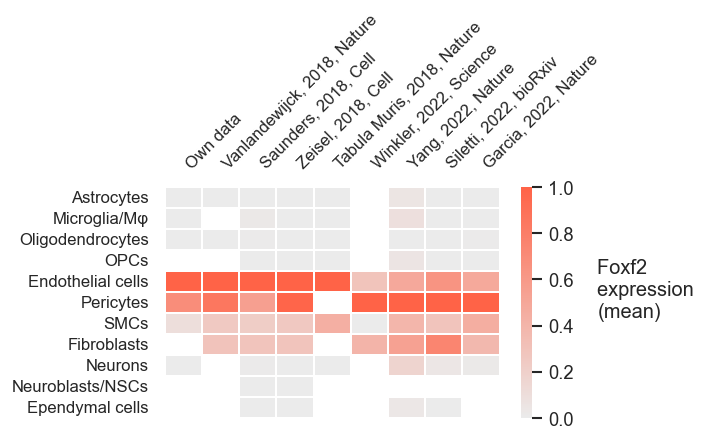

In [128]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P06_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P06_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Prepare weighted mean dataset

In [129]:
# weighted mean per human and mouse studies
# prepare for below

In [130]:
all2_mean_own = all2[all2.source == "Own data"]
#all2_mean_own

In [131]:
all2_mean = all2[all2.source != "Own data"]

In [138]:
# Option: Exclude Yang and Saunders (as outlier studies)

all2_mean = all2_mean[all2_mean["source"] != "Yang, 2022, Nature"]
all2_mean = all2_mean[all2_mean["source"] != "Saunders, 2018, Cell"]

In [139]:
def weighted_mean(group):
    weight_col = 'cell_number'
    weighted_mean_expr = (group['mean_expression'] * group[weight_col]).sum() / group[weight_col].sum()
    weighted_mean_frac_cells = (group['fraction_of_cells'] * group[weight_col]).sum() / group[weight_col].sum()
    total_cell_number = group[weight_col].sum()
    return pd.Series({
        'mean_expression': weighted_mean_expr,
        'fraction_of_cells': weighted_mean_frac_cells,
        'cell_number': total_cell_number
    })

weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()
weighted_mean_df = weighted_mean_df.dropna()

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\979861195.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()
C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\979861195.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean_df = all2_mean.groupby(['clusters', 'organism', 'gene']).apply(weighted_mean).reset_index()


In [66]:
ECs = all2_mean[all2_mean.clusters == "Endothelial cells"]
ECs = ECs[ECs.organism == "Human"]
ECs

clusters  mean_expression  fraction_of_cells   gene  \
0   Endothelial cells         0.291276           0.107273  FOXF2   
51  Endothelial cells         0.484664           0.078342  FOXF2   
41  Endothelial cells         0.638464           0.147531  FOXF2   
18  Endothelial cells         0.490284           0.013450  FOXF2   

                    source organism  cell_number  
0   Winkler, 2022, Science    Human         4950  
51    Garcia, 2022, Nature    Human         6561  
41  Siletti, 2022, bioRxiv    Human         5165  
18      Yang, 2022, Nature    Human        24982

In [67]:
EC_mouse = all2_mean[all2_mean.clusters == "Endothelial cells"]
EC_mouse = EC_mouse[EC_mouse.organism == "Mouse"]
EC_mouse

clusters  mean_expression  fraction_of_cells   gene  \
77  Endothelial cells              1.0           0.752618  Foxf2   
60  Endothelial cells              1.0           0.806400  Foxf2   
9   Endothelial cells              1.0           0.350471  Foxf2   
29  Endothelial cells              1.0           0.193268  Foxf2   

                         source organism  cell_number  
77  Vanlandewijck, 2018, Nature    Mouse         1528  
60   Tabula Muris, 2018, Nature    Mouse          625  
9            Zeisel, 2018, Cell    Mouse         2334  
29         Saunders, 2018, Cell    Mouse        40105

In [68]:
PC_mouse = all2_mean[all2_mean.clusters == "Pericytes®"]
PC_mouse = PC_mouse[PC_mouse.organism == "Mouse"]
PC_mouse

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [141]:
# verify
(ECs['mean_expression'] * ECs['cell_number']).sum()/ECs['cell_number'].sum()

0.47489605386783407

In [71]:
weighted_mean_df

clusters organism   gene  mean_expression  fraction_of_cells  \
0          Astrocytes    Human  FOXF2         0.003052           0.000492   
3          Astrocytes    Mouse  Foxf2         0.002176           0.000722   
4        Microglia/Mφ    Human  FOXF2         0.001467           0.000297   
7        Microglia/Mφ    Mouse  Foxf2         0.010867           0.002785   
8    Oligodendrocytes    Human  FOXF2         0.000459           0.000221   
11   Oligodendrocytes    Mouse  Foxf2         0.007172           0.002109   
12               OPCs    Human  FOXF2         0.001393           0.000504   
15               OPCs    Mouse  Foxf2         0.002760           0.000682   
16  Endothelial cells    Human  FOXF2         0.484124           0.051443   
19  Endothelial cells    Mouse  Foxf2         1.000000           0.229256   
20          Pericytes    Human  FOXF2         1.000000           0.091568   
23          Pericytes    Mouse  Foxf2         0.753907           0.259021   
24               SMCs    Human  FOXF2         0.054076           0.014625   
27               SMCs    Mouse  Foxf2         0.235045           0.064523   
28        Fibroblasts    Human  FOXF2         0.578851           0.130300   
31        Fibroblasts    Mouse  Foxf2         0.286308           0.069300   
32            Neurons    Human  FOXF2         0.042539           0.013614   
35            Neurons    Mouse  Foxf2         0.003704           0.001276   
39   Neuroblasts/NSCs    Mouse  Foxf2         0.000714           0.000211   
40    Ependymal cells    Human  FOXF2         0.006267           0.000887   
43    Ependymal cells    Mouse  Foxf2         0.000000           0.000000   

    cell_number  
0      184963.0  
3       72009.0  
4      101144.0  
7       17238.0  
8      532922.0  
11     140793.0  
12     113087.0  
15      13187.0  
16      41658.0  
19      44592.0  
20      26505.0  
23      10586.0  
24      47932.0  
27       9671.0  
28      19056.0  
31       5570.0  
32    2480786.0  
35     463039.0  
39       9474.0  
40       6767.0  
43       3441.0

## Dotplot

In [142]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
mpl.colormaps.register(mycolormap, force = True)
#plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\2491163207.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [143]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [144]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [145]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

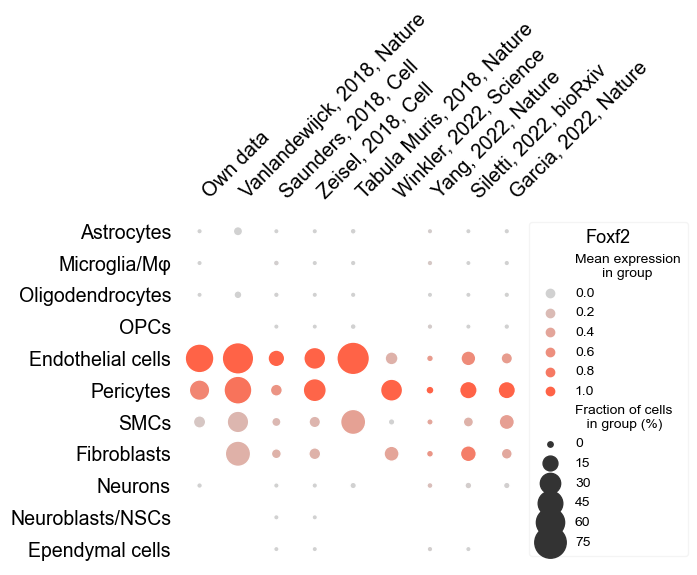

In [51]:
plt.show()

In [52]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.png', dpi=500)

In [53]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.svg', dpi=500)

In [54]:
# format legend as in sc.pl.dotplot()?

In [55]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

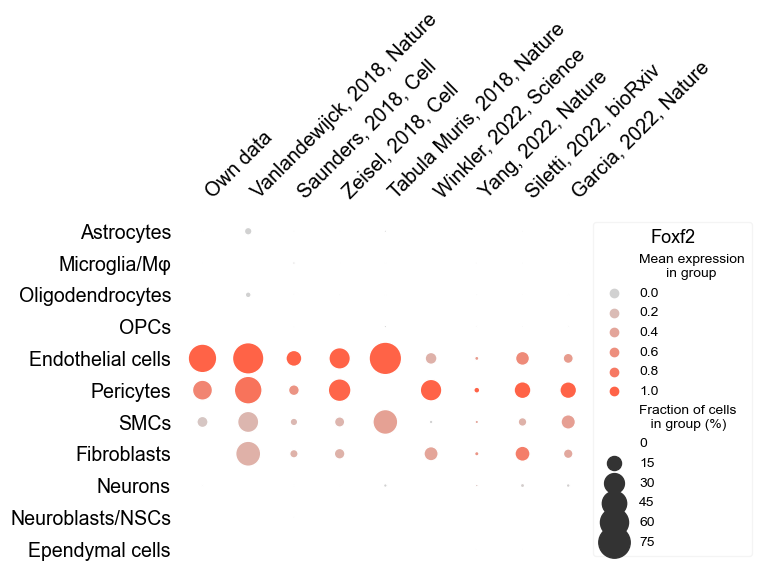

In [56]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [57]:
pl.savefig(main_dir+'\\P06_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.png', dpi=500)

In [58]:
pl.savefig(main_dir+'\\P06_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.svg', dpi=500)

## Cell Numbers

In [59]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source             Own data  Vanlandewijck, 2018, Nature  \
clusters                                                   
Astrocytes              783                          250   
Microglia/Mφ           1360                            0   
Oligodendrocytes         54                          155   
OPCs                      0                            0   
Endothelial cells       338                         1528   
Pericytes                92                         1088   
SMCs                     95                          297   
Fibroblasts               0                           86   
Neurons                 753                            0   
Neuroblasts/NSCs          0                            0   
Ependymal cells           0                            0   
Total                  3475                         3404   

source             Saunders, 2018, Cell  Zeisel, 2018, Cell  \
clusters                                                      
Astrocytes                        51571               19755   
Microglia/Mφ                       6129                6744   
Oligodendrocytes                 113209               26243   
OPCs                              12252                 733   
Endothelial cells                 40105                2334   
Pericytes                          5342                4156   
SMCs                               7667                1575   
Fibroblasts                        3993                1491   
Neurons                          399331               63512   
Neuroblasts/NSCs                   4008                5466   
Ependymal cells                    2022                1419   
Total                            645629              133428   

source             Tabula Muris, 2018, Nature  Winkler, 2022, Science  \
clusters                                                                
Astrocytes                                433                       0   
Microglia/Mφ                             4365                       0   
Oligodendrocytes                         1186                       0   
OPCs                                      202                       0   
Endothelial cells                         625                    4950   
Pericytes                                   0                     329   
SMCs                                      132                   41150   
Fibroblasts                                 0                    3721   
Neurons                                   196                       0   
Neuroblasts/NSCs                            0                       0   
Ependymal cells                             0                       0   
Total                                    7139                   50150   

source             Yang, 2022, Nature  Siletti, 2022, bioRxiv  \
clusters                                                        
Astrocytes                       9943                  163066   
Microglia/Mφ                     1142                   91838   
Oligodendrocytes                 8528                  494966   
OPCs                             1509                  105734   
Endothelial cells               24982                    5165   
Pericytes                       17561                    3693   
SMCs                             4669                    1074   
Fibroblasts                      2032                    9156   
Neurons                           933                 2455885   
Neuroblasts/NSCs                    0                       0   
Ependymal cells                   885                    5882   
Total                           72184                 3336459   

source             Garcia, 2022, Nature    Total  
clusters                                          
Astrocytes                        11954   257755  
Microglia/Mφ                       8164   119742  
Oligodendrocytes                  29428   673769  
OPCs                               5844   126274  
Endothelial cells                  6

In [60]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

## Dotplot (weighted means)

In [146]:
#all2_mean_own

In [147]:
weighted_mean_df["source"] = "meta-analysis"
#weighted_mean_df

In [148]:
weighted_means = pd.concat([weighted_mean_df, all2_mean_own])
weighted_means['source'] = weighted_means['source'] + "-" + weighted_means['organism']
weighted_means

clusters organism   gene  mean_expression  fraction_of_cells  \
0          Astrocytes    Human  FOXF2         0.000559           0.000446   
3          Astrocytes    Mouse  Foxf2         0.002397           0.001370   
4        Microglia/Mφ    Human  FOXF2         0.000491           0.000270   
7        Microglia/Mφ    Mouse  Foxf2         0.001955           0.001530   
8    Oligodendrocytes    Human  FOXF2         0.000466           0.000219   
11   Oligodendrocytes    Mouse  Foxf2         0.000773           0.000653   
12               OPCs    Human  FOXF2         0.000699           0.000475   
15               OPCs    Mouse  Foxf2         0.000000           0.001070   
16  Endothelial cells    Human  FOXF2         0.474896           0.108359   
19  Endothelial cells    Mouse  Foxf2         1.000000           0.550925   
20          Pericytes    Human  FOXF2         1.000000           0.218582   
23          Pericytes    Mouse  Foxf2         0.956535           0.432685   
24               SMCs    Human  FOXF2         0.018035           0.015186   
27               SMCs    Mouse  Foxf2         0.267579           0.144212   
28        Fibroblasts    Human  FOXF2         0.582884           0.144091   
31        Fibroblasts    Mouse  Foxf2         0.288410           0.107800   
32            Neurons    Human  FOXF2         0.042491           0.013617   
35            Neurons    Mouse  Foxf2         0.001976           0.001303   
39   Neuroblasts/NSCs    Mouse  Foxf2         0.000000           0.000000   
40    Ependymal cells    Human  FOXF2         0.002025           0.000680   
43    Ependymal cells    Mouse  Foxf2         0.000000           0.000000   
67         Astrocytes    Mouse  Foxf2         0.001149           0.001277   
70       Microglia/Mφ    Mouse  Foxf2         0.001050           0.000735   
72   Oligodendrocytes    Mouse  Foxf2         0.000000           0.000000   
68  Endothelial cells    Mouse  Foxf2         1.000000           0.624260   
73          Pericytes    Mouse  Foxf2         0.689168           0.304348   
74               SMCs    Mouse  Foxf2         0.100788           0.094737   
71            Neurons    Mouse  Foxf2         0.001397           0.002656   

    cell_number               source  
0      175020.0  meta-analysis-Human  
3       20438.0  meta-analysis-Mouse  
4      100002.0  meta-analysis-Human  
7       11109.0  meta-analysis-Mouse  
8      524394.0  meta-analysis-Human  
11      27584.0  meta-analysis-Mouse  
12     111578.0  meta-analysis-Human  
15        935.0  meta-analysis-Mouse  
16      16676.0  meta-analysis-Human  
19       4487.0  meta-analysis-Mouse  
20       8944.0  meta-analysis-Human  
23       5244.0  meta-analysis-Mouse  
24      43263.0  meta-analysis-Human  
27       2004.0  meta-analysis-Mouse  
28      17024.0  meta-analysis-Human  
31       1577.0  meta-analysis-Mouse  
32    2479853.0  meta-analysis-Human  
35      63708.0  meta-analysis-Mouse  
39       5466.0  meta-analysis-Mouse  
40       5882.0  meta-analysis-Human  
43       1419.0  meta-analysis-Mouse  
67        783.0       Own data-Mouse  
70       1360.0       Own data-Mouse  
72         54.0       Own data-Mouse  
68        338.0       Own data-Mouse  
73         92.0       Own data-Mouse  
74         95.0       Own data-Mouse  
71        753.0       Own data-Mouse

In [161]:
weighted_means.cell_number.sum()

3630082.0

In [149]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
mpl.colormaps.register(mycolormap, force = True)
#plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_13316\3242459060.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [150]:
weighted_means['fraction_of_cells'] = weighted_means['fraction_of_cells']*100

In [151]:
weighted_means.columns = ['clusters', 'organism', 'gene', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)',
       'cell_number', 'source']

In [155]:
sns.set(style="white")
pl=sns.relplot(data=weighted_means, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.7,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

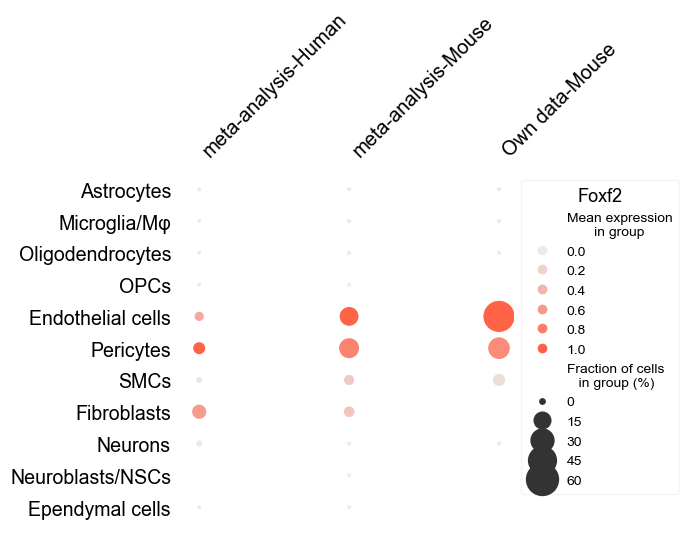

In [82]:
plt.show()

In [152]:
main_dir

'/Volumes/BD-Dichgans/SF'

In [157]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_weightedmean.png', dpi=500)

In [158]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_weightedmean.svg', dpi=500)

In [54]:
# format legend as in sc.pl.dotplot()?

In [61]:
del all
del all2
del all4
del all5

## Include AV zonation

### Load data

In [62]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230302_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230310_Vanlandewijck2018_incl_zonation.csv']

In [63]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [64]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [65]:
all.clusters2.value_counts()

Fibroblasts              4
Pericytes                4
SMCs                     4
ECs_Arterial             3
Astrocytes               3
ECs_Capillary            3
Oligos                   3
ECs_Venous               2
vECs                     2
Neurons                  2
OPCs                     2
Microglia                1
capECs                   1
aECs                     1
Microglia/Macrophages    1
T cells                  1
Ependymal cells          1
Fibromyocytes            1
ECs_non_AV               1
Name: clusters2, dtype: int64

In [66]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters2)

clusters2          Astrocytes  ECs_Arterial  ECs_Capillary  ECs_Venous  \
source                                                                   
Garcia2022                  1             0              0           0   
Vanlandewijck2018           1             1              1           0   
Winkler2022                 0             1              1           1   
Yang2022                    1             1              1           1   

clusters2          ECs_non_AV  Ependymal cells  Fibroblasts  Fibromyocytes  \
source                                                                       
Garcia2022                  0                0            1              0   
Vanlandewijck2018           1                0            1              0   
Winkler2022                 0                0            1              1   
Yang2022                    0                1            1              0   

clusters2          Microglia  Microglia/Macrophages  Neurons  OPCs  Oligos  \
source                                                                       
Garcia2022                 1                      0        1     1       1   
Vanlandewijck2018          0                      0        0     0       1   
Winkler2022                0                      0        0     0       0   
Yang2022                   0                      1        1     1       1   

clusters2          Pericytes  SMCs  T cells  aECs  capECs  vECs  
source                                                           
Garcia2022                 1     1        0     1       1     1  
Vanlandewijck2018          1     1        0     0       0     1  
Winkler2022                1     1        0     0       0     0  
Yang2022                   1     1        1     0       0     0

### Format

#### Remove celltypes

In [67]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [68]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [69]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [70]:
all = all.replace("ECs_Arterial","aECs")

In [71]:
all = all.replace("ECs_Capillary","capECs")

In [72]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [73]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [74]:
all = all.replace("Microglia","Microglia/Mφ")

In [75]:
all = all.replace("Macrophages","Microglia/Mφ")

In [76]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [77]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [78]:
all2 = all

In [79]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [80]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [81]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [82]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [83]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [84]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [85]:
all2 = all2.replace("Heindl2022","Own data")

In [86]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [87]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [88]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [89]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [90]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [91]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [92]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [93]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [94]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [95]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


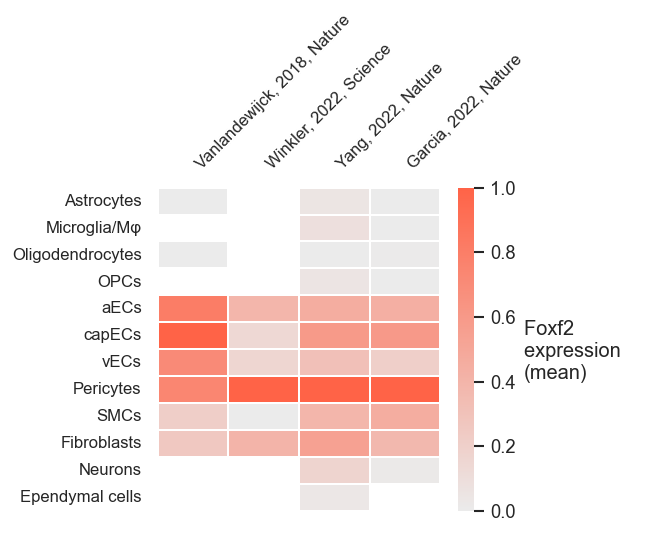

In [96]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [97]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [98]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [99]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [100]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

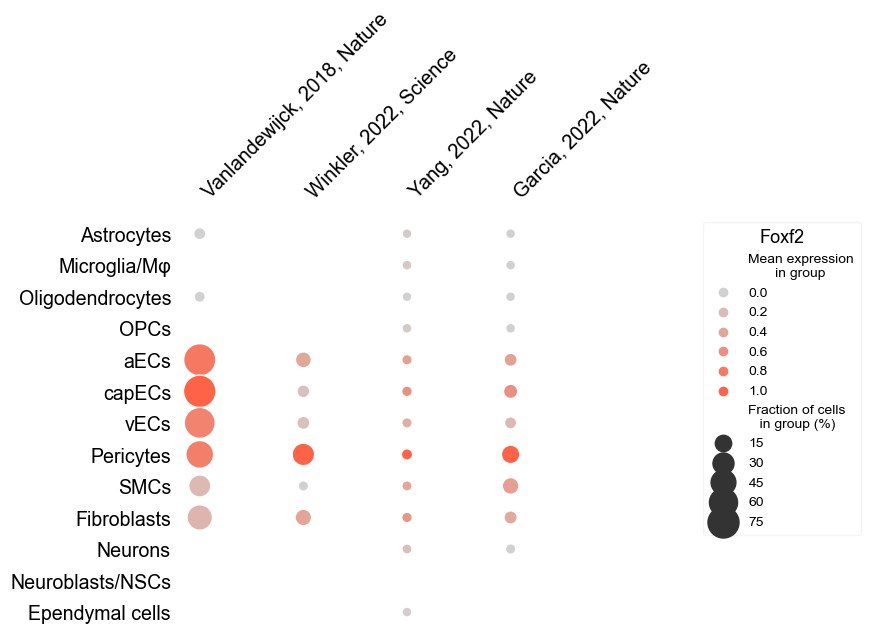

In [101]:
plt.show()

In [102]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.png', dpi=500)

In [103]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.svg', dpi=500)

## Cell Numbers

In [104]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source            Vanlandewijck, 2018, Nature  Winkler, 2022, Science  \
clusters                                                                
Astrocytes                                250                       0   
Microglia/Mφ                                0                       0   
Oligodendrocytes                          155                       0   
OPCs                                        0                       0   
aECs                                      397                    2886   
capECs                                    405                     165   
vECs                                      298                    1899   
Pericytes                                1088                     329   
SMCs                                      297                   41150   
Fibroblasts                                86                    3721   
Neurons                                     0                       0   
Ependymal cells                             0                       0   
Total                                    2976                   50150   

source            Yang, 2022, Nature  Garcia, 2022, Nature   Total  
clusters                                                            
Astrocytes                      9943                 11954   22147  
Microglia/Mφ                    1142                  8164    9306  
Oligodendrocytes                8528                 29428   38111  
OPCs                            1509                  5844    7353  
aECs                            4486                   826    8595  
capECs                         13357                  4160   18087  
vECs                            7139                  1575   10911  
Pericytes                      17561                  4932   23910  
SMCs                            4669                  1029   47145  
Fibroblasts                     2032                  4147    9986  
Neurons                          933                 23968   24901  
Ependymal cells                  885                     0     885  
Total                          72184                 96027  221337

In [105]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells_incl_AV_zonation.csv',sep=";")

In [106]:
del all
del all2
del all4
del all5
del all_files

# Other genes: Tek

In [130]:
gene="Tek"

## Load data

In [131]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20230228_Tek_Zeisel2018_normalized.csv',
 '20230228_TEK_Winkler2022_normalized.csv',
 '20230228_TEK_Yang2022_normalized.csv',
 '20230301_Tek_Saunders2018_normalized.csv',
 '20230302_TEK_Siletti2022_normalized.csv',
 '20230302_TEK_Garcia2022_normalized.csv',
 '20230310_Tek_Heindl2022_normalized.csv',
 '20230310_Tek_Vanlandewijck2018.csv',
 '20230310_Tek_TabulaMuris2018_normalized.csv']

In [132]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [133]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [134]:
all.gene.unique()

array(['Tek', 'TEK'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [112]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Pericytes                          8
Oligos                             8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Endothelial cells                  5
Microglia/Macrophages              5
Ependymal cells                    4
ECs                                4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Leptomeningeal cells               1
Name: clusters, dtype: int64

In [113]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Yang2022                    1                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Yang2022                           0                1            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Yang2022                       0             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Yang2022                     0          0                      1            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Yang2022                      0        1     1     

In [114]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [115]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [116]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [117]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [118]:
all = all.replace("Microglia","Microglia/Mφ")

In [119]:
all = all.replace("Macrophages","Microglia/Mφ")

In [120]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [121]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis']

### SMCs/Pericytes

In [122]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [123]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [124]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [125]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [126]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [127]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [128]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells gene        source  \
6   Neuroblasts/NSCs         0.000221           0.000549  Tek    Zeisel2018   
33  Neuroblasts/NSCs         0.000000           0.000499  Tek  Saunders2018   

   organism  cell_number  
6     Mouse         5466  
33    Mouse         4008

### Rename ECs

In [129]:
# rename ECs to Endothelial cells

In [130]:
all2 = all

In [131]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [132]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [133]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [134]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [135]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [136]:
all2 = all2.sort_values("clusters")

### Rename studies

In [137]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [138]:
all2 = all2.replace("Heindl2022","Own data")

In [139]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [140]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [141]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [142]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [143]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [144]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [145]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [146]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [147]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [148]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


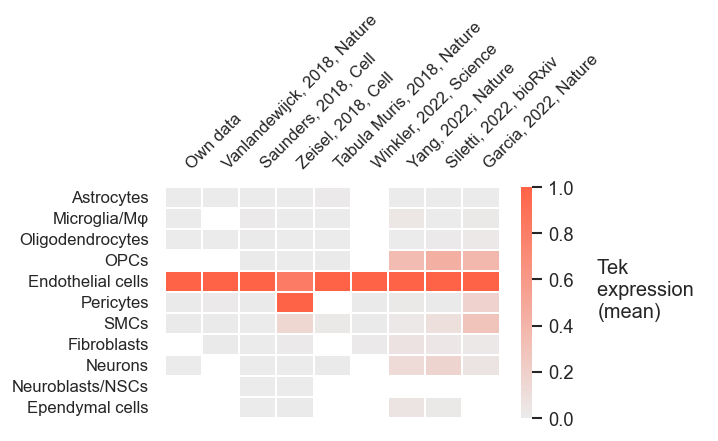

In [149]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [150]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [151]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [152]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [153]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

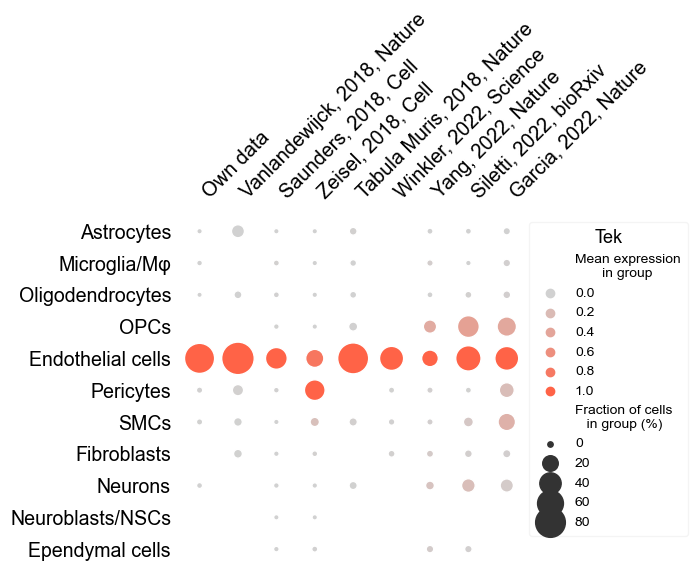

In [154]:
plt.show()

In [155]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [156]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

In [157]:
del all
del all2
del all4

## Include AV zonation

### Load data

In [158]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_TEK_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Tek_Vanlandewijck2018_incl_zonation.csv']

In [159]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [160]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [161]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [162]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [163]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [164]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [165]:
all = all.replace("ECs_Arterial","aECs")

In [166]:
all = all.replace("ECs_Capillary","capECs")

In [167]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [168]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [169]:
all = all.replace("Microglia","Microglia/Mφ")

In [170]:
all = all.replace("Macrophages","Microglia/Mφ")

In [171]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [172]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [173]:
all2 = all

In [174]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [175]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [176]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [177]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [178]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [179]:
all2 = all2.replace("Heindl2022","Own data")

In [180]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [181]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [182]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [183]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [184]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [185]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [186]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [187]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [188]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [189]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


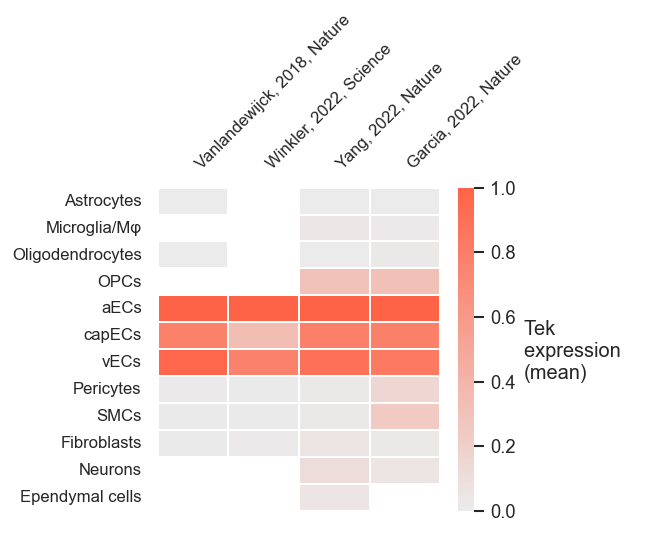

In [190]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [191]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [192]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [193]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [194]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

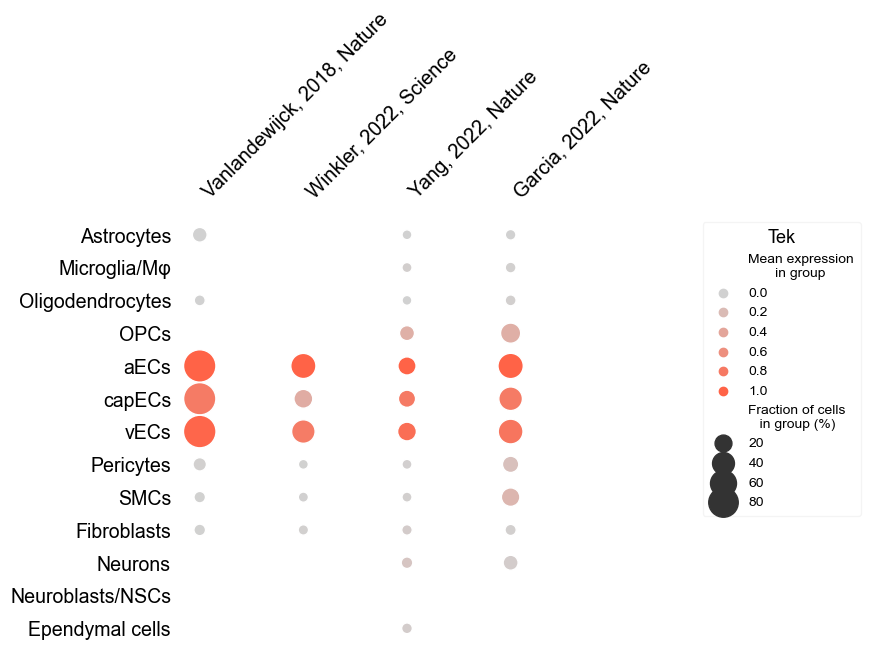

In [195]:
plt.show()

In [196]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [197]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [198]:
del all
del all2
del all4
del all_files

# Other genes: Foxo1

In [135]:
gene="Foxo1"

## Load data

In [136]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20230228_FOXO1_Winkler2022_normalized.csv',
 '20230228_Foxo1_Zeisel2018_normalized.csv',
 '20230228_FOXO1_Yang2022_normalized.csv',
 '20230302_FOXO1_Siletti2022_normalized.csv',
 '20230301_Foxo1_Saunders2018_normalized.csv',
 '20230302_FOXO1_Garcia2022_normalized.csv',
 '20230310_Foxo1_Heindl2022_normalized.csv',
 '20230310_Foxo1_Vanlandewijck2018.csv',
 '20230310_Foxo1_TabulaMuris2018_normalized.csv',
 '20230512_Foxo1_Saunders2018_normalized.csv']

In [137]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [138]:
all.source.unique()

array(['Winkler2022', 'Zeisel2018', 'Yang2022', 'Siletti2022',
       'Saunders2018', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [139]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [204]:
all.clusters.value_counts()

SMCs                               9
Pericytes                          8
Astrocytes                         8
Oligos                             8
Neurons                            7
OPCs                               6
Fibroblasts                        6
Microglia/Macrophages              5
Endothelial cells                  5
ECs                                4
Ependymal cells                    4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
Leptomeningeal cells               1
T cells                            1
Choroid plexus epithelial cells    1
Macrophages                        1
Neurogenesis                       1
Microglia                          1
Immune_Other                       1
Name: clusters, dtype: int64

In [205]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Yang2022                    1                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Yang2022                           0                1            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Yang2022                       0             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Yang2022                     0          0                      1            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Yang2022                      0        1     1     

In [206]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [207]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [208]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [209]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Macrophages',
 'Neurogenesis',
 'Microglia']

In [210]:
all = all.replace("Microglia","Microglia/Mφ")

In [211]:
all = all.replace("Macrophages","Microglia/Mφ")

In [212]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [213]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [214]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [215]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [216]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [217]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [218]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [219]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [220]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
11  Neuroblasts/NSCs         0.032349           0.039517  Foxo1    Zeisel2018   
44  Neuroblasts/NSCs         0.055644           0.027944  Foxo1  Saunders2018   

   organism  cell_number  
11    Mouse         5466  
44    Mouse         4008

### Rename ECs

In [221]:
# rename ECs to Endothelial cells

In [222]:
all2 = all

In [223]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [224]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [225]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [226]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [227]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [228]:
all2 = all2.sort_values("clusters")

### Rename studies

In [229]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [230]:
all2 = all2.replace("Heindl2022","Own data")

In [231]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [232]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [233]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [234]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [235]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [236]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [237]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [238]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [239]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [240]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


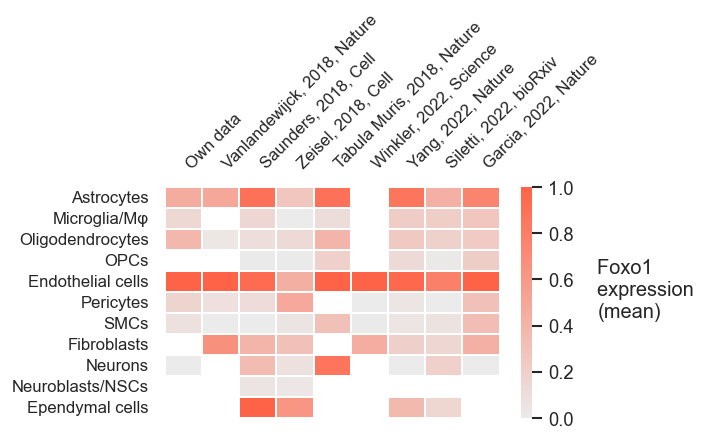

In [241]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [242]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [243]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [244]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [245]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

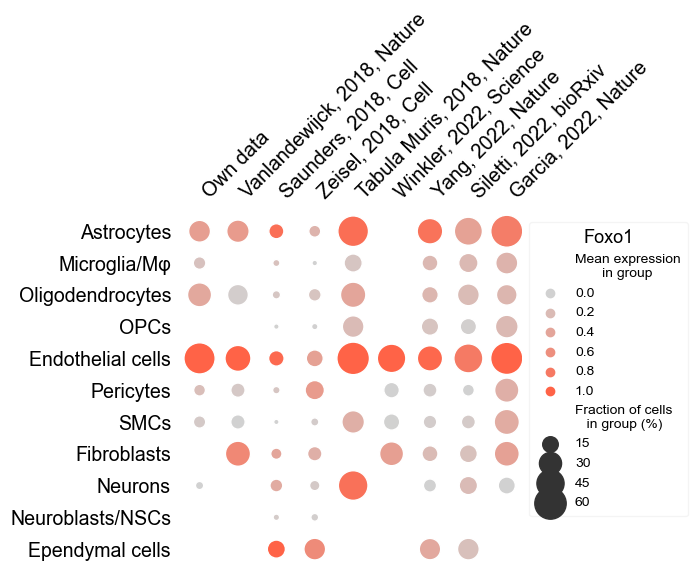

In [246]:
plt.show()

In [247]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [248]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [249]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_FOXO1_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Foxo1_Vanlandewijck2018_incl_zonation.csv']

In [250]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [251]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [252]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

In [253]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [254]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [255]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [256]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [257]:
all = all.replace("ECs_Arterial","aECs")

In [258]:
all = all.replace("ECs_Capillary","capECs")

In [259]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [260]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [261]:
all = all.replace("Microglia","Microglia/Mφ")

In [262]:
all = all.replace("Macrophages","Microglia/Mφ")

In [263]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [264]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [265]:
all2 = all

#### Set order of axes

In [266]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [267]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [268]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [269]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [270]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [271]:
all2 = all2.replace("Heindl2022","Own data")

In [272]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [273]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [274]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [275]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [276]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [277]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [278]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [279]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [280]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [281]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


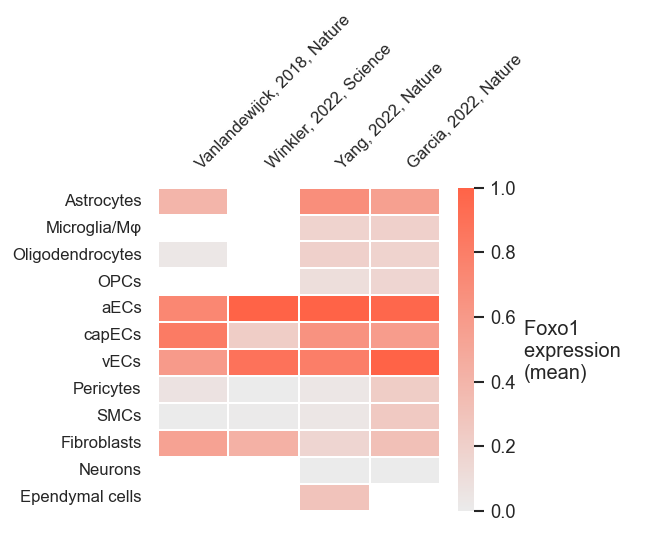

In [282]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [283]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [284]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [285]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [286]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

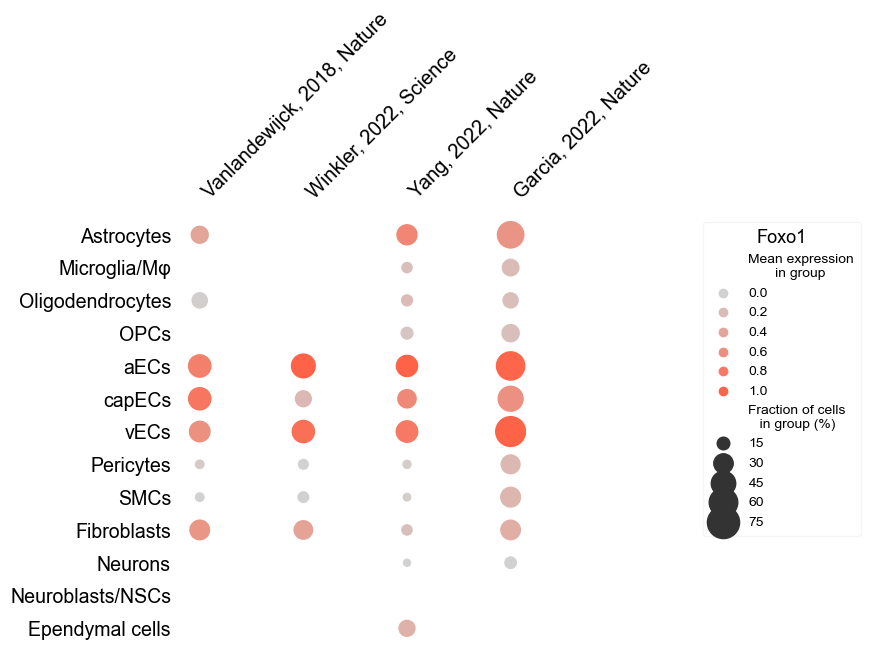

In [287]:
plt.show()

In [288]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [289]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [290]:
del all
del all2
del all4
del all_files

# Other genes: Nos3

In [140]:
gene="Nos3"

## Load data

In [141]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20230228_Nos3_Zeisel2018_normalized.csv',
 '20230228_NOS3_Winkler2022_normalized.csv',
 '20230228_NOS3_Yang2022_normalized.csv',
 '20230301_Nos3_Saunders2018_normalized.csv',
 '20230302_NOS3_Siletti2022_normalized.csv',
 '20230302_NOS3_Garcia2022_normalized.csv',
 '20230310_Nos3_Heindl2022_normalized.csv',
 '20230310_Nos3_Vanlandewijck2018.csv',
 '20230310_Nos3_TabulaMuris2018_normalized.csv']

In [142]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [143]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [144]:
all.gene.unique()

array(['Nos3', 'NOS3'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [190]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Pericytes                          8
Oligos                             8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Endothelial cells                  5
Microglia/Macrophages              5
Ependymal cells                    4
ECs                                4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Leptomeningeal cells               1
Name: clusters, dtype: int64

In [191]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Yang2022                    1                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Yang2022                           0                1            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Yang2022                       0             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Yang2022                     0          0                      1            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Yang2022                      0        1     1     

In [192]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [193]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [194]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [195]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [196]:
all = all.replace("Microglia","Microglia/Mφ")

In [197]:
all = all.replace("Macrophages","Microglia/Mφ")

In [198]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [199]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis']

### SMCs/Pericytes

In [200]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [201]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [202]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [203]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [204]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [205]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [206]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells  gene        source  \
6   Neuroblasts/NSCs         0.039580           0.010062  Nos3    Zeisel2018   
33  Neuroblasts/NSCs         0.017165           0.003743  Nos3  Saunders2018   

   organism  cell_number  
6     Mouse         5466  
33    Mouse         4008

### Rename ECs

In [207]:
# rename ECs to Endothelial cells

In [208]:
all2 = all

In [209]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [210]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [211]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [212]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [213]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [214]:
all2 = all2.sort_values("clusters")

### Rename studies

In [215]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [216]:
all2 = all2.replace("Heindl2022","Own data")

In [217]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [218]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [219]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [220]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [221]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [222]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [223]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [224]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [235]:
all2

clusters  mean_expression  fraction_of_cells  gene  \
0         Astrocytes         0.038204           0.006581  Nos3   
68        Astrocytes         0.000000           0.056000  Nos3   
59        Astrocytes         0.031923           0.024266  Nos3   
50        Astrocytes         0.000018           0.002008  NOS3   
39        Astrocytes         0.001526           0.000803  NOS3   
..               ...              ...                ...   ...   
6   Neuroblasts/NSCs         0.039580           0.010062  Nos3   
30   Ependymal cells         0.093670           0.022750  Nos3   
19   Ependymal cells         0.006166           0.003390  NOS3   
42   Ependymal cells         0.038575           0.014111  NOS3   
1    Ependymal cells         0.238638           0.062016  Nos3   

                         source organism  cell_number  
0            Zeisel, 2018, Cell    Mouse        19755  
68  Vanlandewijck, 2018, Nature    Mouse          250  
59                     Own data    Mouse          783  
50         Garcia, 2022, Nature    Human        11954  
39       Siletti, 2022, bioRxiv    Human       163066  
..                          ...      ...          ...  
6            Zeisel, 2018, Cell    Mouse         5466  
30         Saunders, 2018, Cell    Mouse         2022  
19           Yang, 2022, Nature    Human          885  
42       Siletti, 2022, bioRxiv    Human         5882  
1            Zeisel, 2018, Cell    Mouse         1419  

[75 rows x 7 columns]

In [233]:
all2.set_index(['clusters','source'])

mean_expression  \
clusters         source                                         
Astrocytes       Zeisel, 2018, Cell                  0.038204   
                 Vanlandewijck, 2018, Nature         0.000000   
                 Own data                            0.031923   
                 Garcia, 2022, Nature                0.000018   
                 Siletti, 2022, bioRxiv              0.001526   
...                                                       ...   
Neuroblasts/NSCs Zeisel, 2018, Cell                  0.039580   
Ependymal cells  Saunders, 2018, Cell                0.093670   
                 Yang, 2022, Nature                  0.006166   
                 Siletti, 2022, bioRxiv              0.038575   
                 Zeisel, 2018, Cell                  0.238638   

                                              fraction_of_cells  gene  \
clusters         source                                                 
Astrocytes       Zeisel, 2018, Cell                    0.006581  Nos3   
                 Vanlandewijck, 2018, Nature           0.056000  Nos3   
                 Own data                              0.024266  Nos3   
                 Garcia, 2022, Nature                  0.002008  NOS3   
                 Siletti, 2022, bioRxiv                0.000803  NOS3   
...                                                         ...   ...   
Neuroblasts/NSCs Zeisel, 2018, Cell                    0.010062  Nos3   
Ependymal cells  Saunders, 2018, Cell                  0.022750  Nos3   
                 Yang, 2022, Nature                    0.003390  NOS3   
                 Siletti, 2022, bioRxiv                0.014111  NOS3   
                 Zeisel, 2018, Cell                    0.062016  Nos3   

                                             organism  cell_number  
clusters         source                                             
Astrocytes       Zeisel, 2018, Cell             Mouse        19755  
                 Vanlandewijck, 2018, Nature    Mouse          250  
                 Own data                       Mouse          783  
                 Garcia, 2022, Nature           Human        11954  
                 Siletti, 2022, bioRxiv         Human       163066  
...                                               ...          ...  
Neuroblasts/NSCs Zeisel, 2018, Cell             Mouse         5466  
Ependymal cells  Saunders, 2018, Cell           Mouse         2022  
                 Yang, 2022, Nature             Human          885  
                 Siletti, 2022, bioRxiv         Human         5882  
                 Zeisel, 2018, Cell             Mouse         1419  

[75 rows x 5 columns]

In [231]:
all2.set_index(['clusters','source'])['mean_expression']

clusters          source                     
Astrocytes        Zeisel, 2018, Cell             0.038204
                  Vanlandewijck, 2018, Nature    0.000000
                  Own data                       0.031923
                  Garcia, 2022, Nature           0.000018
                  Siletti, 2022, bioRxiv         0.001526
                                                   ...   
Neuroblasts/NSCs  Zeisel, 2018, Cell             0.039580
Ependymal cells   Saunders, 2018, Cell           0.093670
                  Yang, 2022, Nature             0.006166
                  Siletti, 2022, bioRxiv         0.038575
                  Zeisel, 2018, Cell             0.238638
Name: mean_expression, Length: 75, dtype: float64

In [232]:
all2.set_index(['clusters','source'])['mean_expression'].unstack()

source             Own data  Vanlandewijck, 2018, Nature  \
clusters                                                   
Astrocytes         0.031923                     0.000000   
Microglia/Mφ       0.006520                          NaN   
Oligodendrocytes   0.000000                     0.005379   
OPCs                    NaN                          NaN   
Endothelial cells  1.000000                     1.000000   
Pericytes          0.000000                     0.003093   
SMCs               0.036143                     0.005031   
Fibroblasts             NaN                     0.052781   
Neurons            0.017700                          NaN   
Neuroblasts/NSCs        NaN                          NaN   
Ependymal cells         NaN                          NaN   

source             Saunders, 2018, Cell  Zeisel, 2018, Cell  \
clusters                                                      
Astrocytes                     0.015930            0.038204   
Microglia/Mφ                   0.019248            0.000000   
Oligodendrocytes               0.010767            0.006117   
OPCs                           0.014671            0.065956   
Endothelial cells              1.000000            0.981928   
Pericytes                      0.012409            1.000000   
SMCs                           0.000000            0.125381   
Fibroblasts                    0.012206            0.034024   
Neurons                        0.015374            0.074136   
Neuroblasts/NSCs               0.017165            0.039580   
Ependymal cells                0.093670            0.238638   

source             Tabula Muris, 2018, Nature  Winkler, 2022, Science  \
clusters                                                                
Astrocytes                           0.029830                     NaN   
Microglia/Mφ                         0.002704                     NaN   
Oligodendrocytes                     0.006943                     NaN   
OPCs                                 0.096897                     NaN   
Endothelial cells                    1.000000                1.000000   
Pericytes                                 NaN                0.000000   
SMCs                                 0.048498                0.006522   
Fibroblasts                               NaN                0.026624   
Neurons                              0.042359                     NaN   
Neuroblasts/NSCs                          NaN                     NaN   
Ependymal cells                           NaN                     NaN   

source             Yang, 2022, Nature  Siletti, 2022, bioRxiv  \
clusters                                                        
Astrocytes                   0.021332                0.001526   
Microglia/Mφ                 0.000000                0.001912   
Oligodendrocytes             0.037134                0.000000   
OPCs                         0.033535                0.000357   
Endothelial cells            1.000000                1.000000   
Pericytes                    0.034082                0.009724   
SMCs                         0.032471                0.159187   
Fibroblasts                  0.066724                0.056987   
Neurons                      0.084413                0.024640   
Neuroblasts/NSCs                  NaN                     NaN   
Ependymal cells              0.006166                0.038575   

source             Garcia, 2022, Nature  
clusters                                 
Astrocytes                     0.000018  
Microglia/Mφ                   0.003034  
Oligodendrocytes               0.002094  
OPCs                           0.000000  
Endothelial cells              1.000000  
Pericytes                      0.110679  
SMCs                           0.205483  
Fibroblasts                    0.004909  
Neurons                        0.005833  
Neuroblasts/NSCs                    NaN  
Ependymal cells                     NaN

In [230]:
all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index()

source           clusters  Own data  Vanlandewijck, 2018, Nature  \
0              Astrocytes  0.031923                     0.000000   
1            Microglia/Mφ  0.006520                          NaN   
2        Oligodendrocytes  0.000000                     0.005379   
3                    OPCs       NaN                          NaN   
4       Endothelial cells  1.000000                     1.000000   
5               Pericytes  0.000000                     0.003093   
6                    SMCs  0.036143                     0.005031   
7             Fibroblasts       NaN                     0.052781   
8                 Neurons  0.017700                          NaN   
9        Neuroblasts/NSCs       NaN                          NaN   
10        Ependymal cells       NaN                          NaN   

source  Saunders, 2018, Cell  Zeisel, 2018, Cell  Tabula Muris, 2018, Nature  \
0                   0.015930            0.038204                    0.029830   
1                   0.019248            0.000000                    0.002704   
2                   0.010767            0.006117                    0.006943   
3                   0.014671            0.065956                    0.096897   
4                   1.000000            0.981928                    1.000000   
5                   0.012409            1.000000                         NaN   
6                   0.000000            0.125381                    0.048498   
7                   0.012206            0.034024                         NaN   
8                   0.015374            0.074136                    0.042359   
9                   0.017165            0.039580                         NaN   
10                  0.093670            0.238638                         NaN   

source  Winkler, 2022, Science  Yang, 2022, Nature  Siletti, 2022, bioRxiv  \
0                          NaN            0.021332                0.001526   
1                          NaN            0.000000                0.001912   
2                          NaN            0.037134                0.000000   
3                          NaN            0.033535                0.000357   
4                     1.000000            1.000000                1.000000   
5                     0.000000            0.034082                0.009724   
6                     0.006522            0.032471                0.159187   
7                     0.026624            0.066724                0.056987   
8                          NaN            0.084413                0.024640   
9                          NaN                 NaN                     NaN   
10                         NaN            0.006166                0.038575   

source  Garcia, 2022, Nature  
0                   0.000018  
1                   0.003034  
2                   0.002094  
3                   0.000000  
4                   1.000000  
5                   0.110679  
6                   0.205483  
7                   0.004909  
8                   0.005833  
9                        NaN  
10                       NaN

In [139]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [332]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


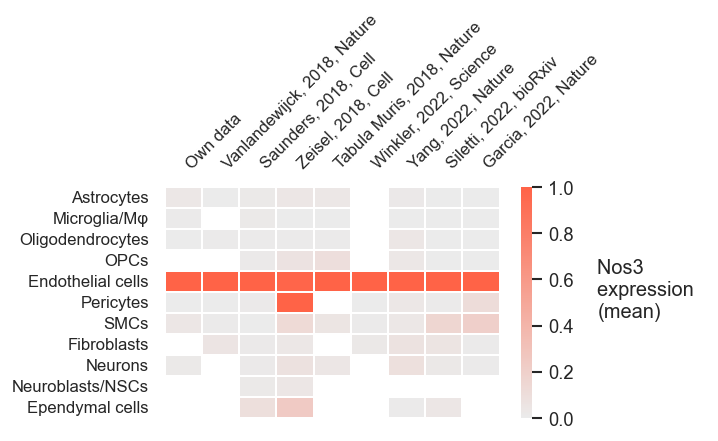

In [333]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [334]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [335]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [336]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [337]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

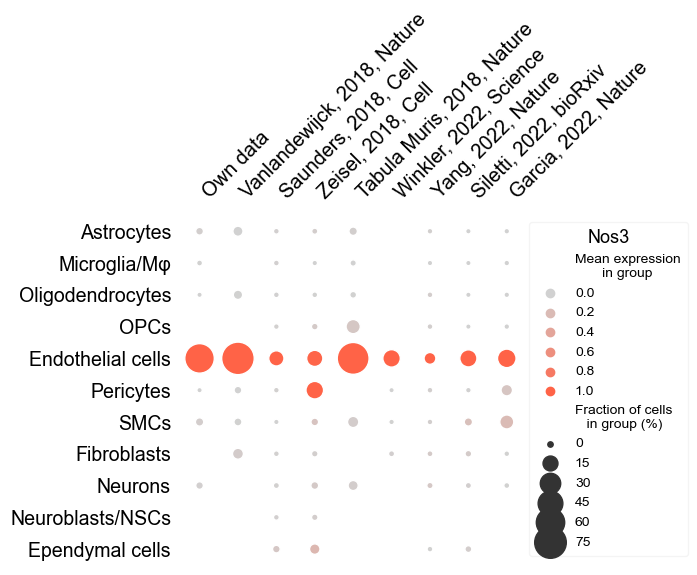

In [338]:
plt.show()

In [339]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [340]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [341]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_NOS3_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Nos3_Vanlandewijck2018_incl_zonation.csv']

In [342]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [343]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [344]:
all.gene.unique()

array(['NOS3', 'Nos3'], dtype=object)

In [345]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [346]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [347]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [348]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [349]:
all = all.replace("ECs_Arterial","aECs")

In [350]:
all = all.replace("ECs_Capillary","capECs")

In [351]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [352]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [353]:
all = all.replace("Microglia","Microglia/Mφ")

In [354]:
all = all.replace("Macrophages","Microglia/Mφ")

In [355]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [356]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [357]:
all2 = all

#### Set order of axes

In [358]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [359]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [360]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [361]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [362]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [363]:
all2 = all2.replace("Heindl2022","Own data")

In [364]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [365]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [366]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [367]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [368]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [369]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [370]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [371]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [372]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [373]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


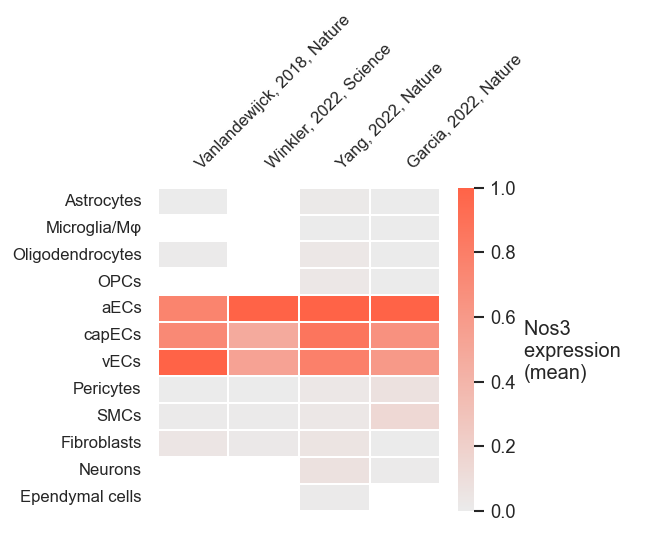

In [374]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [375]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [376]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [377]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [378]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

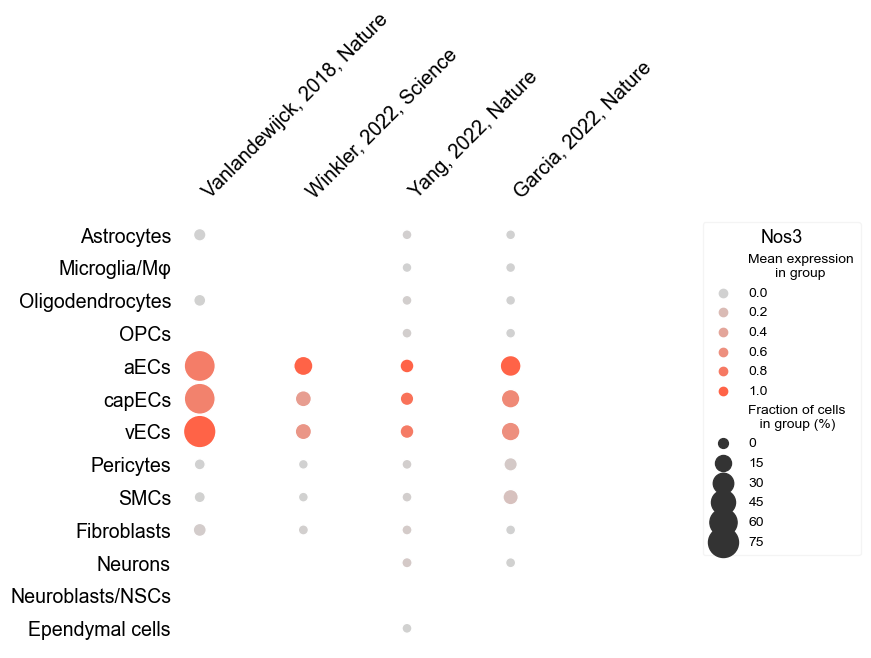

In [379]:
plt.show()

In [380]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [381]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Htra1

In [276]:
gene="Htra1"

## Load data

In [277]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Htra1_Saunders2018_normalized.csv',
 '20240122_Htra1_TabulaMuris2018_normalized.csv',
 '20240122_Htra1_Zeisel2018_normalized.csv',
 '20240122_HTRA1_Garcia2022_normalized.csv',
 '20240122_HTRA1_Siletti2022_normalized.csv',
 '20240122_HTRA1_Yang2022_normalized.csv',
 '20240122_HTRA1_Winkler2022_normalized.csv',
 '20240122_Htra1_Heindl2022_normalized.csv',
 '20240122_Htra1_Vanlandewijck2018.csv']

In [278]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [279]:
all.source.unique()

array(['Saunders2018', 'TabulaMuris2018', 'Zeisel2018', 'Garcia2022',
       'Siletti2022', 'Yang2022', 'Winkler2022', 'Heindl2022',
       'Vanlandewijck2018'], dtype=object)

In [280]:
all.gene.unique()

array(['Htra1', 'HTRA1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [105]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Oligos                             8
Pericytes                          8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Microglia/Macrophages              5
Endothelial cells                  5
Ependymal cells                    4
ECs                                4
Unknown                            2
Immune_Other                       1
T cells                            1
Fibromyocytes                      1
Microglia                          1
Choroid plexus epithelial cells    1
Macrophages                        1
Olfactory ensheathing cells        1
Neuroblasts                        1
Leptomeningeal cells               1
Neurogenesis                       1
Name: clusters, dtype: int64

In [106]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Yang2022                    1                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Yang2022                           0                1            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Yang2022                       0             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Yang2022                     0          0                      1            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Yang2022                      0        1     1     

In [107]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [108]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [109]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [110]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Microglia',
 'Macrophages',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

In [111]:
all = all.replace("Microglia","Microglia/Mφ")

In [112]:
all = all.replace("Macrophages","Microglia/Mφ")

In [113]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [114]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [115]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [116]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [117]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [118]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [119]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [120]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [121]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
57  Neuroblasts/NSCs         0.004708           0.015185  Htra1    Zeisel2018   
76  Neuroblasts/NSCs         0.006584           0.025948  Htra1  Saunders2018   

   organism  cell_number  
57    Mouse         5466  
76    Mouse         4008

### Rename ECs

In [122]:
# rename ECs to Endothelial cells

In [123]:
all2 = all

In [124]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [125]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [126]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [127]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [128]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [129]:
all2 = all2.sort_values("clusters")

### Rename studies

In [130]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [131]:
all2 = all2.replace("Heindl2022","Own data")

In [132]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [133]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [134]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [135]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [136]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [137]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [138]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [139]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [140]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [141]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


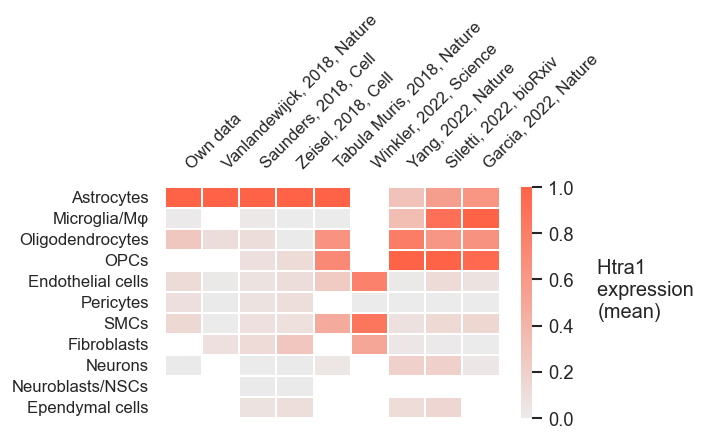

In [142]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [143]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [144]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [145]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [146]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

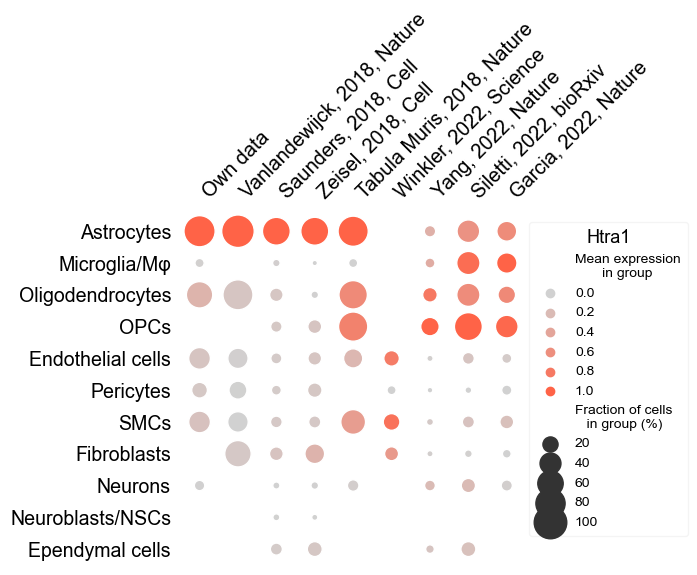

In [147]:
plt.show()

In [148]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [149]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [59]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_Htra1_Vanlandewijck2018_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Garcia2022_incl_zonation_normalized.csv']

In [60]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [61]:
all.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022', 'Garcia2022'],
      dtype=object)

In [62]:
all.gene.unique()

array(['Htra1', 'HTRA1'], dtype=object)

In [63]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes',
 'Microglia',
 'aECs',
 'capECs',
 'vECs']

### Format

#### Remove celltypes

In [64]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [65]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [66]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [67]:
all = all.replace("ECs_Arterial","aECs")

In [68]:
all = all.replace("ECs_Capillary","capECs")

In [69]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [70]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Microglia']

In [71]:
all = all.replace("Microglia","Microglia/Mφ")

In [72]:
all = all.replace("Macrophages","Microglia/Mφ")

In [73]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [74]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [75]:
all2 = all

#### Set order of axes

In [76]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [77]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [78]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [79]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [80]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [81]:
all2 = all2.replace("Heindl2022","Own data")

In [82]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [83]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [84]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [85]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [86]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [87]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [88]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [89]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [90]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [91]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


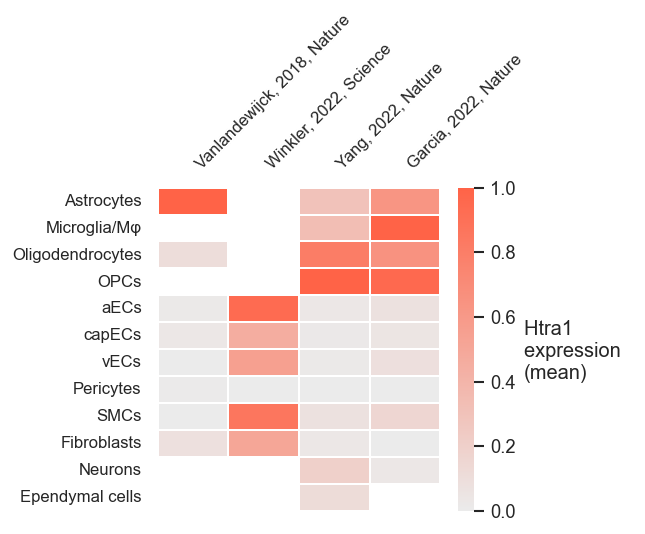

In [92]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [93]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [94]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [95]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [96]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

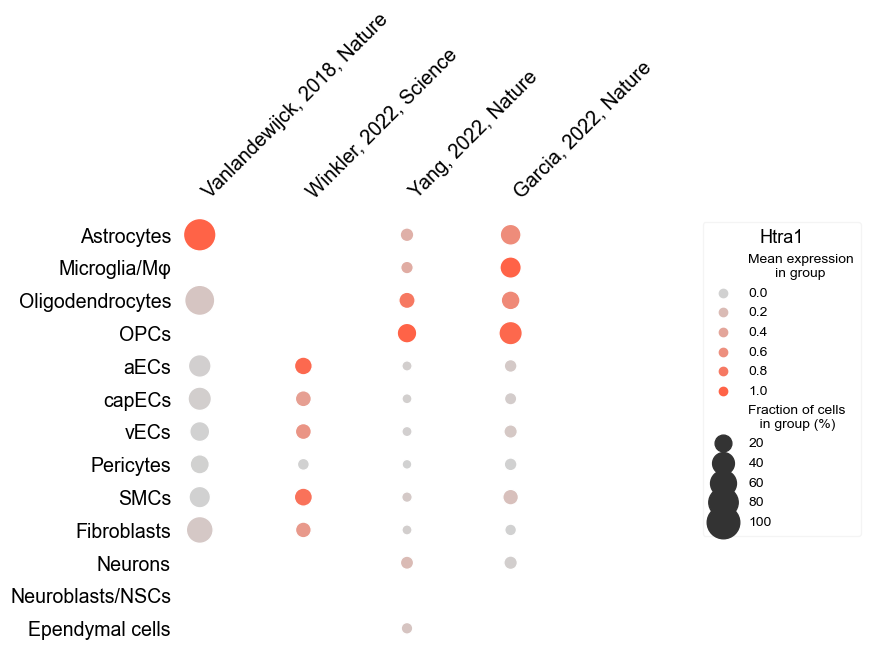

In [97]:
plt.show()

In [98]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [99]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Egfl8

In [202]:
gene="Egfl8"

## Load data

In [203]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Egfl8_Saunders2018_normalized.csv',
 '20240122_Egfl8_TabulaMuris2018_normalized.csv',
 '20240122_Egfl8_Zeisel2018_normalized.csv',
 '20240122_EGFL8_Garcia2022_normalized.csv',
 '20240122_EGFL8_Siletti2022_normalized.csv',
 '20240122_EGFL8_Winkler2022_normalized.csv',
 '20240122_Egfl8_Heindl2022_normalized.csv',
 '20240122_Egfl8_Vanlandewijck2018.csv']

In [204]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [205]:
# Yang2022 did not include EGFL8

In [206]:
all.source.unique()

array(['Saunders2018', 'TabulaMuris2018', 'Zeisel2018', 'Garcia2022',
       'Siletti2022', 'Winkler2022', 'Heindl2022', 'Vanlandewijck2018'],
      dtype=object)

In [207]:
all.gene.unique()

array(['Egfl8', 'EGFL8'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [204]:
all.clusters.value_counts()

SMCs                               8
Astrocytes                         7
Oligos                             7
Pericytes                          7
Neurons                            6
OPCs                               5
Endothelial cells                  5
Fibroblasts                        5
Microglia/Macrophages              4
ECs                                3
Ependymal cells                    3
Unknown                            2
Fibromyocytes                      1
Choroid plexus epithelial cells    1
Macrophages                        1
Immune_Other                       1
Microglia                          1
Olfactory ensheathing cells        1
Neuroblasts                        1
Leptomeningeal cells               1
Neurogenesis                       1
Name: clusters, dtype: int64

In [205]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  Choroid plexus epithelial cells  ECs  \
source                                                                
Garcia2022                  1                                0    1   
Heindl2022                  1                                0    0   
Saunders2018                1                                0    0   
Siletti2022                 1                                1    0   
TabulaMuris2018             1                                0    0   
Vanlandewijck2018           1                                0    1   
Winkler2022                 0                                0    1   
Zeisel2018                  1                                0    0   

clusters           Endothelial cells  Ependymal cells  Fibroblasts  \
source                                                               
Garcia2022                         0                0            1   
Heindl2022                         1                0            0   
Saunders2018                       1                1            1   
Siletti2022                        1                1            1   
TabulaMuris2018                    1                0            0   
Vanlandewijck2018                  0                0            1   
Winkler2022                        0                0            1   
Zeisel2018                         1                1            0   

clusters           Fibromyocytes  Immune_Other  Leptomeningeal cells  \
source                                                                 
Garcia2022                     0             0                     0   
Heindl2022                     0             1                     0   
Saunders2018                   0             0                     0   
Siletti2022                    0             0                     0   
TabulaMuris2018                0             0                     0   
Vanlandewijck2018              0             0                     0   
Winkler2022                    1             0                     0   
Zeisel2018                     0             0                     1   

clusters           Macrophages  Microglia  Microglia/Macrophages  Neuroblasts  \
source                                                                          
Garcia2022                   0          1                      0            0   
Heindl2022                   0          0                      1            0   
Saunders2018                 0          0                      1            0   
Siletti2022                  1          0                      0            0   
TabulaMuris2018              0          0                      1            0   
Vanlandewijck2018            0          0                      0            0   
Winkler2022                  0          0                      0            0   
Zeisel2018                   0          0                      1            1   

clusters           Neurogenesis  Neurons  OPCs  Olfactory ensheathing cells  \
source                                                                        
Garcia2022                    0        1     1                            0   
Heindl2022                    0        1     0                            0   
Saunders2018                  1        1     1                            0   
Siletti2022                   0        1     1                            0   
TabulaMuris2018               0        1     1                            0   
Vanlandewijck2018             0        0     0                            0   
Winkler2022                   0        0     0                            0   
Zeisel2018                    0        1     1                            1   

clusters           Oligos  Pericytes  SMCs  Unknown  
source                                               
Garcia2022              1          1     1        0  
Heindl2022              1          1     1        1  
Saunders2018            1          1     1       

In [206]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [207]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [208]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [209]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'Macrophages',
 'OPCs',
 'Microglia',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

In [210]:
all = all.replace("Microglia","Microglia/Mφ")

In [211]:
all = all.replace("Macrophages","Microglia/Mφ")

In [212]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [213]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [214]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [215]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [216]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [217]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [218]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [219]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [220]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
46  Neuroblasts/NSCs         0.000000           0.002012  Egfl8    Zeisel2018   
65  Neuroblasts/NSCs         0.004378           0.002246  Egfl8  Saunders2018   

   organism  cell_number  
46    Mouse         5466  
65    Mouse         4008

### Rename ECs

In [221]:
# rename ECs to Endothelial cells

In [222]:
all2 = all

In [223]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [224]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [225]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [226]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Siletti2022", "Garcia2022"])

In [227]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [228]:
all2 = all2.sort_values("clusters")

### Rename studies

In [229]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [230]:
all2 = all2.replace("Heindl2022","Own data")

In [231]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [232]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [233]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [234]:
#all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [235]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [236]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [237]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [238]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [239]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [240]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


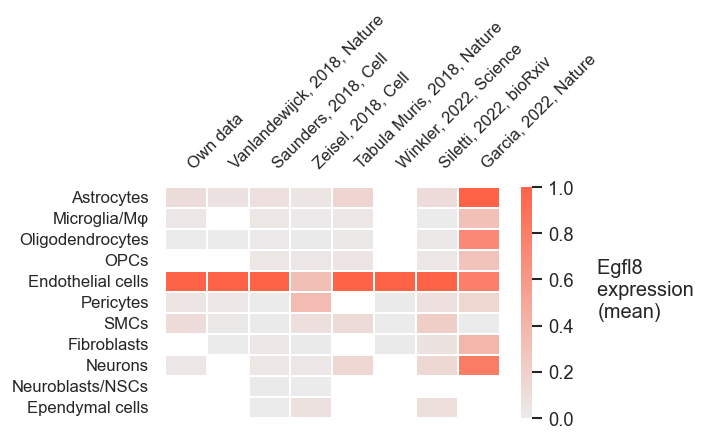

In [241]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [242]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [243]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [244]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [245]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

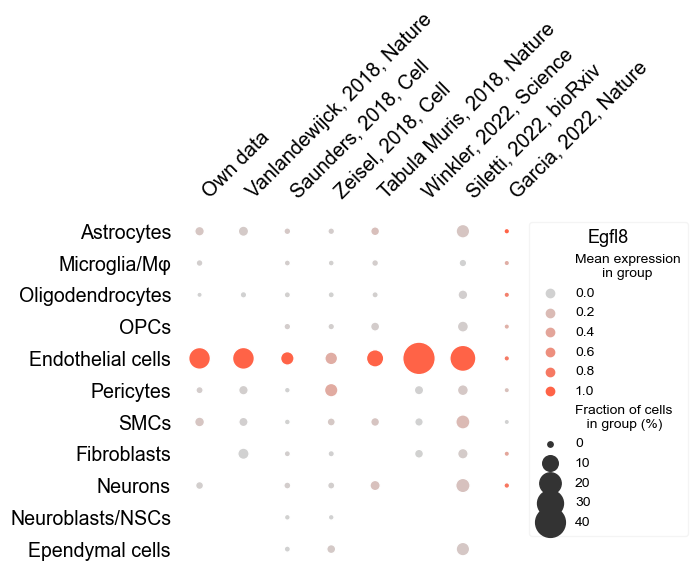

In [246]:
plt.show()

In [247]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [248]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [15]:
path = main_dir+'//P06_Foxf2_per_celltype//Other_genes_summarized//incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['/Volumes/BD-Dichgans/SF//P06_Foxf2_per_celltype//Other_genes_summarized//incl_zonation/20230614_Egfl8_Vanlandewijck2018_incl_zonation.csv']

In [250]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [251]:
all.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Garcia2022'], dtype=object)

In [252]:
all.gene.unique()

array(['Egfl8', 'EGFL8'], dtype=object)

In [253]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Fibromyocytes',
 'Microglia',
 'Neurons',
 'OPCs',
 'aECs',
 'capECs',
 'vECs']

### Format

#### Remove celltypes

In [254]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [255]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [256]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [257]:
all = all.replace("ECs_Arterial","aECs")

In [258]:
all = all.replace("ECs_Capillary","capECs")

In [259]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [260]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia',
 'Neurons',
 'OPCs']

In [261]:
all = all.replace("Microglia","Microglia/Mφ")

In [262]:
all = all.replace("Macrophages","Microglia/Mφ")

In [263]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [264]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [265]:
all2 = all

#### Set order of axes

In [266]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [267]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Garcia2022"])

In [268]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [269]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [270]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [271]:
all2 = all2.replace("Heindl2022","Own data")

In [272]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [273]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [274]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [275]:
#all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [276]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [277]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [278]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [279]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [280]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [281]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


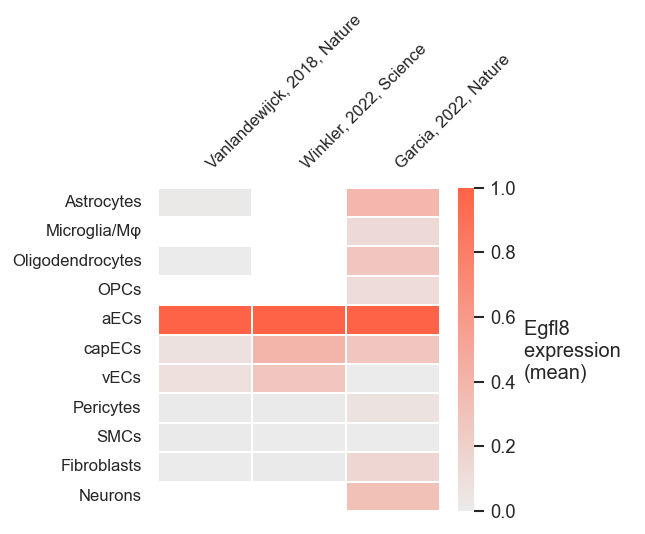

In [282]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [283]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [284]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [285]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [286]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

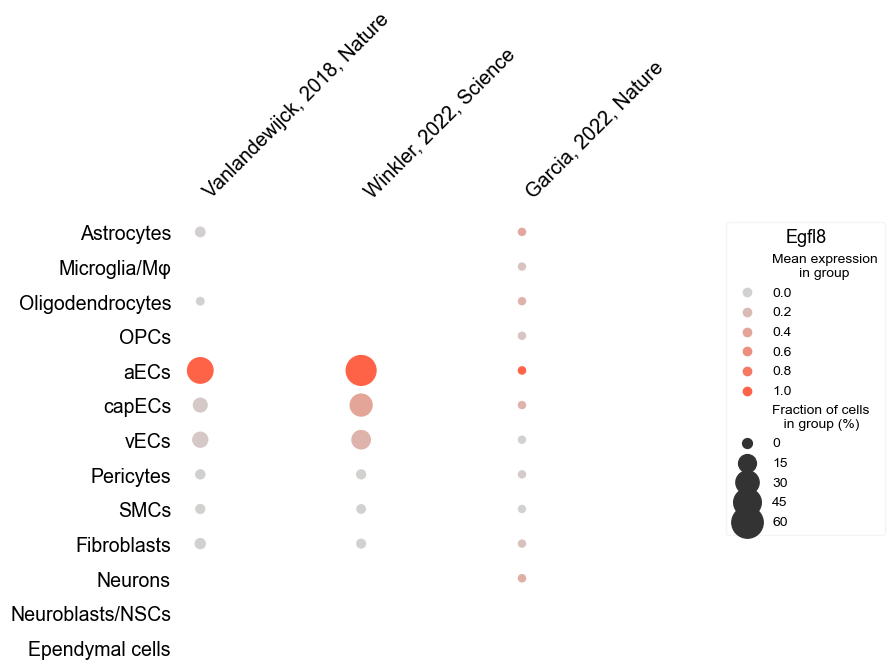

In [287]:
plt.show()

In [288]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [289]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Flt1

In [801]:
gene="Flt1"

## Load data

In [802]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Flt1_Heindl2022_normalized.csv',
 '20240122_Flt1_Vanlandewijck2018.csv',
 '20240122_Flt1_Saunders2018_normalized.csv',
 '20240122_FLT1_Winkler2022_normalized.csv',
 '20240122_FLT1_Siletti2022_normalized.csv',
 '20240122_FLT1_Garcia2022_normalized.csv',
 '20240122_FLT1_Yang2022_normalized.csv',
 '20240122_Flt1_Zeisel2018_normalized.csv',
 '20240122_Flt1_TabulaMuris2018_normalized.csv']

In [803]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [804]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Saunders2018', 'Winkler2022',
       'Siletti2022', 'Garcia2022', 'Yang2022', 'Zeisel2018',
       'TabulaMuris2018'], dtype=object)

In [805]:
all.gene.unique()

array(['Flt1', 'FLT1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [806]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [807]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [808]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Macrophages              1
Microglia                1
Neuroblasts              1
Leptomeningeal cells     1
Name: clusters, dtype: int64

In [809]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [810]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [811]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'Neurogenesis',
 'OPCs',
 'Macrophages',
 'Microglia',
 'Neuroblasts',
 'Leptomeningeal cells']

In [812]:
all = all.replace("Microglia","Microglia/Mφ")

In [813]:
all = all.replace("Macrophages","Microglia/Mφ")

In [814]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [815]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'Neurogenesis',
 'OPCs',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [816]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [817]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [818]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [819]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [820]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [821]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [822]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells  gene        source  \
20  Neuroblasts/NSCs         0.000000           0.011228  Flt1  Saunders2018   
68  Neuroblasts/NSCs         0.000381           0.003110  Flt1    Zeisel2018   

   organism  cell_number  
20    Mouse         4008  
68    Mouse         5466

### Rename ECs

In [823]:
# rename ECs to Endothelial cells

In [824]:
all2 = all

In [825]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [826]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'Neuroblasts/NSCs',
 'OPCs']

In [827]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [828]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [829]:
all2 = all2.sort_values("clusters")

### Rename studies

In [830]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [831]:
all2 = all2.replace("Heindl2022","Own data")

In [832]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [833]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [834]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [835]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [836]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [837]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [838]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [839]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [840]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [841]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


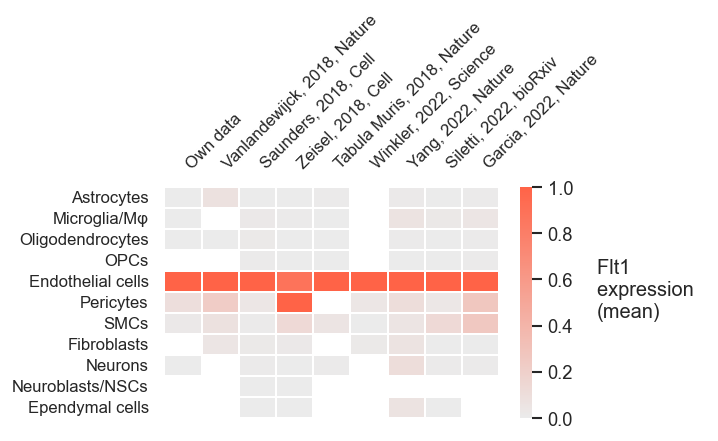

In [842]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [843]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [844]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [845]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [846]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

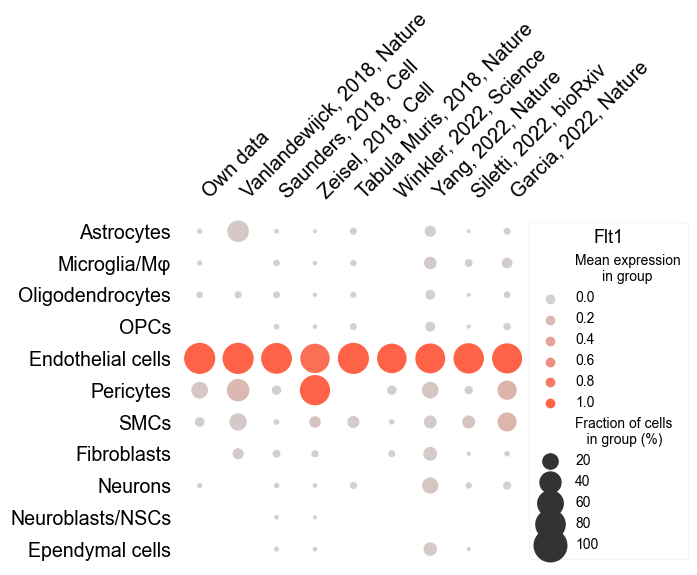

In [847]:
plt.show()

In [848]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [849]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [850]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Flt1_Vanlandewijck2018_incl_zonation.csv',
 '20240122_FLT1_Yang2022_incl_zonation_normalized.csv',
 '20240122_FLT1_Winkler2022_incl_zonation_normalized.csv']

In [851]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [852]:
all.gene.unique()

array(['Flt1', 'FLT1'], dtype=object)

In [853]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [854]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [855]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [856]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [857]:
all = all.replace("ECs_Arterial","aECs")

In [858]:
all = all.replace("ECs_Capillary","capECs")

In [859]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [860]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [861]:
all = all.replace("Microglia","Microglia/Mφ")

In [862]:
all = all.replace("Macrophages","Microglia/Mφ")

In [863]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [864]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [865]:
all2 = all

#### Set order of axes

In [866]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [867]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022'], dtype=object)

In [868]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [869]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [870]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [871]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [872]:
all2 = all2.replace("Heindl2022","Own data")

In [873]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [874]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [875]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [876]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [877]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [878]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [879]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [880]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [881]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [882]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


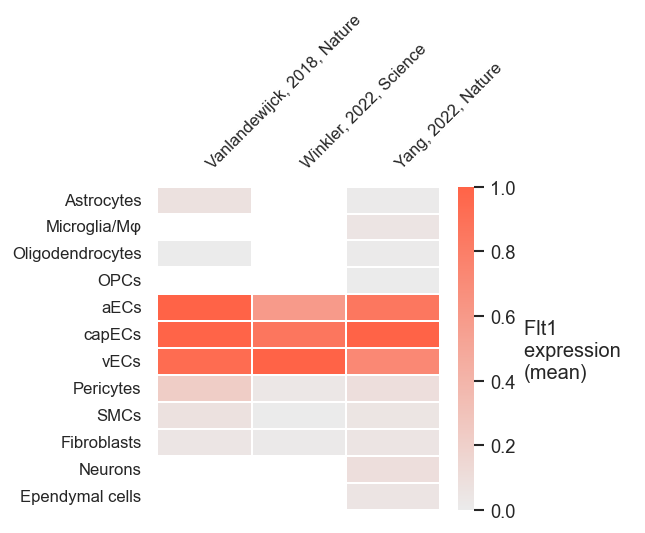

In [883]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [884]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [885]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [886]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [887]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

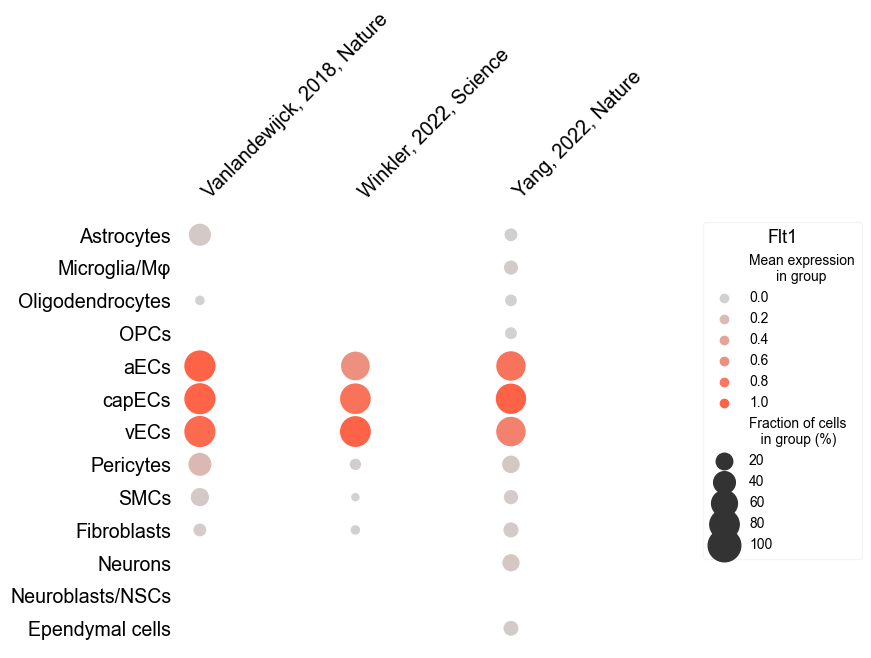

In [888]:
plt.show()

In [889]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [890]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Kdr

In [891]:
gene="Kdr"

## Load data

In [892]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Kdr_Heindl2022_normalized.csv',
 '20240122_Kdr_Vanlandewijck2018.csv',
 '20240122_KDR_Yang2022_normalized.csv',
 '20240122_Kdr_Saunders2018_normalized.csv',
 '20240122_Kdr_Zeisel2018_normalized.csv',
 '20240122_KDR_Winkler2022_normalized.csv',
 '20240122_Kdr_TabulaMuris2018_normalized.csv',
 '20240122_KDR_Siletti2022_normalized.csv',
 '20240122_KDR_Garcia2022_normalized.csv']

In [893]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [894]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Siletti2022',
       'Garcia2022'], dtype=object)

In [895]:
all.gene.unique()

array(['Kdr', 'KDR'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [896]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [897]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [898]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Macrophages              1
Microglia                1
Name: clusters, dtype: int64

In [899]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [900]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [901]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Macrophages',
 'Microglia']

In [902]:
all = all.replace("Microglia","Microglia/Mφ")

In [903]:
all = all.replace("Macrophages","Microglia/Mφ")

In [904]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [905]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [906]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [907]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [908]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [909]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [910]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [911]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [912]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells gene        source  \
31  Neuroblasts/NSCs         0.000000           0.001248  Kdr  Saunders2018   
43  Neuroblasts/NSCs         0.000344           0.002012  Kdr    Zeisel2018   

   organism  cell_number  
31    Mouse         4008  
43    Mouse         5466

### Rename ECs

In [913]:
# rename ECs to Endothelial cells

In [914]:
all2 = all

In [915]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [916]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [917]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [918]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [919]:
all2 = all2.sort_values("clusters")

### Rename studies

In [920]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [921]:
all2 = all2.replace("Heindl2022","Own data")

In [922]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [923]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [924]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [925]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [926]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [927]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [928]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [929]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [930]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [931]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


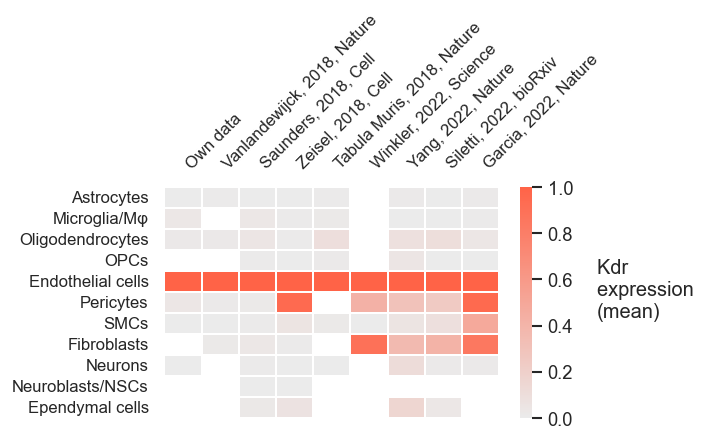

In [938]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [939]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [940]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [941]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [942]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

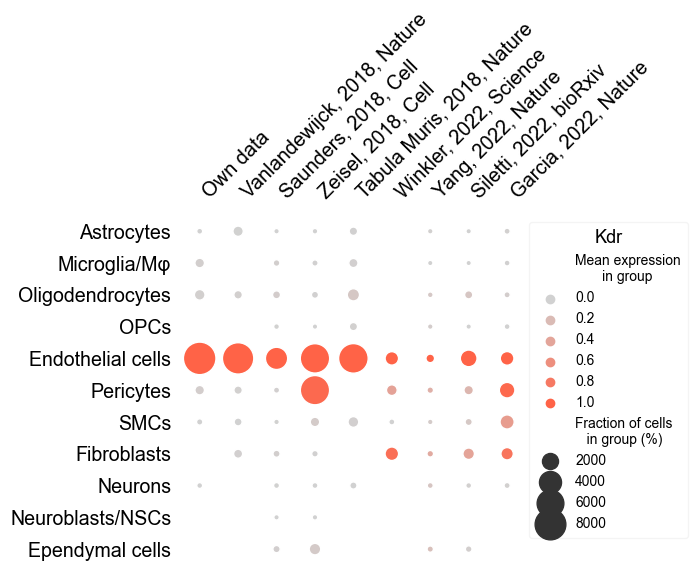

In [943]:
plt.show()

In [944]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [945]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [948]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Kdr_Vanlandewijck2018_incl_zonation.csv',
 '20240122_KDR_Yang2022_incl_zonation_normalized.csv',
 '20240122_KDR_Winkler2022_incl_zonation_normalized.csv']

In [950]:
filename

'20240122_KDR_Winkler2022_incl_zonation_normalized.csv'

In [951]:
os.path.join(path,filename)

'/Volumes/BD-Dichgans/SF/P06_Foxf2_per_celltype/Other_genes_summarized/incl_zonation/20240122_KDR_Winkler2022_incl_zonation_normalized.csv'

In [953]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [954]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Kdr_Vanlandewijck2018_incl_zonation.csv',
 '20240122_KDR_Yang2022_incl_zonation_normalized.csv',
 '20240122_KDR_Winkler2022_incl_zonation_normalized.csv']

In [955]:
all.gene.unique()

array(['Kdr', 'KDR'], dtype=object)

In [956]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [957]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [958]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [959]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [960]:
all = all.replace("ECs_Arterial","aECs")

In [961]:
all = all.replace("ECs_Capillary","capECs")

In [962]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [963]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [964]:
all = all.replace("Microglia","Microglia/Mφ")

In [965]:
all = all.replace("Macrophages","Microglia/Mφ")

In [966]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [967]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [968]:
all2 = all

#### Set order of axes

In [969]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [970]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022'], dtype=object)

In [971]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [972]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [973]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [974]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [975]:
all2 = all2.replace("Heindl2022","Own data")

In [976]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [977]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [978]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [979]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [980]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [981]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [982]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [983]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [984]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [985]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


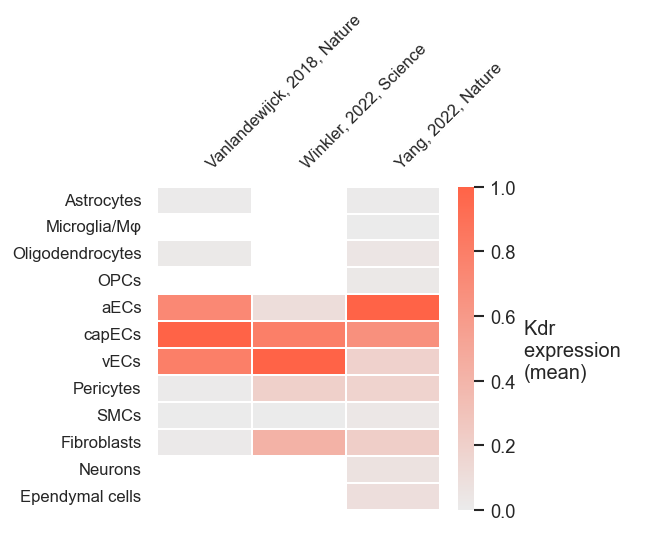

In [986]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [987]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [988]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [989]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [990]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

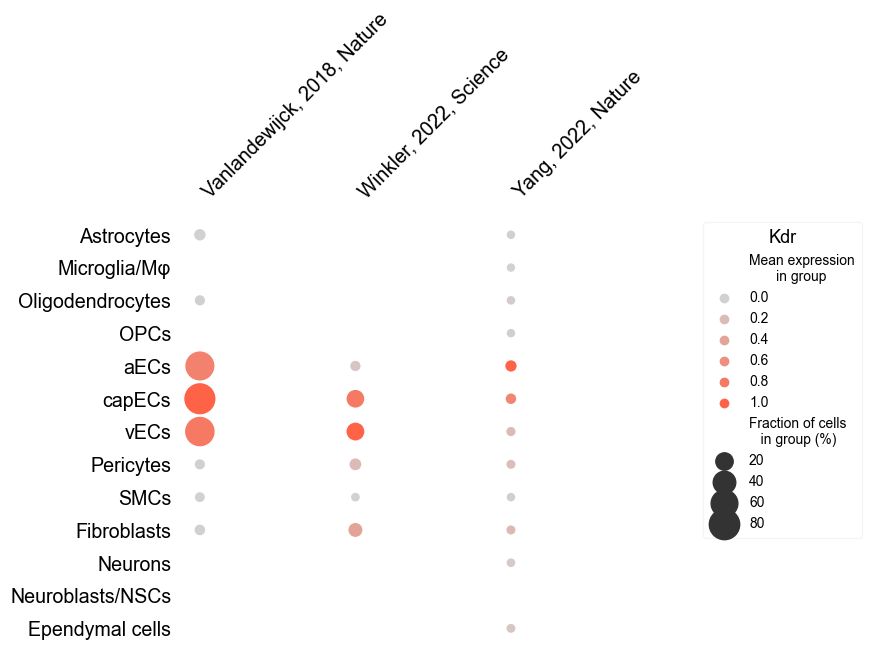

In [991]:
plt.show()

In [992]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [993]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Nrp1

In [994]:
gene="Nrp1"

## Load data

In [995]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Nrp1_Heindl2022_normalized.csv',
 '20240122_Nrp1_Vanlandewijck2018.csv',
 '20240122_NRP1_Yang2022_normalized.csv',
 '20240122_Nrp1_Saunders2018_normalized.csv',
 '20240122_Nrp1_Zeisel2018_normalized.csv',
 '20240122_NRP1_Winkler2022_normalized.csv',
 '20240122_Nrp1_TabulaMuris2018_normalized.csv',
 '20240122_NRP1_Siletti2022_normalized.csv',
 '20240122_NRP1_Garcia2022_normalized.csv']

In [996]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [997]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Siletti2022',
       'Garcia2022'], dtype=object)

In [998]:
all.gene.unique()

array(['Nrp1', 'NRP1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [999]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1000]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1001]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Macrophages              1
Microglia                1
Name: clusters, dtype: int64

In [1002]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1003]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1004]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Macrophages',
 'Microglia']

In [1005]:
all = all.replace("Microglia","Microglia/Mφ")

In [1006]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1007]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1008]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1009]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1010]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1011]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1012]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1013]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1014]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1015]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells  gene        source  \
31  Neuroblasts/NSCs         0.154748           0.079840  Nrp1  Saunders2018   
43  Neuroblasts/NSCs         0.274999           0.189352  Nrp1    Zeisel2018   

   organism  cell_number  
31    Mouse         4008  
43    Mouse         5466

### Rename ECs

In [1016]:
# rename ECs to Endothelial cells

In [1017]:
all2 = all

In [1018]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1019]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [1020]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1021]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1022]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1023]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1024]:
all2 = all2.replace("Heindl2022","Own data")

In [1025]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1026]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1027]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1028]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1029]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1030]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1031]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1032]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1033]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1036]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


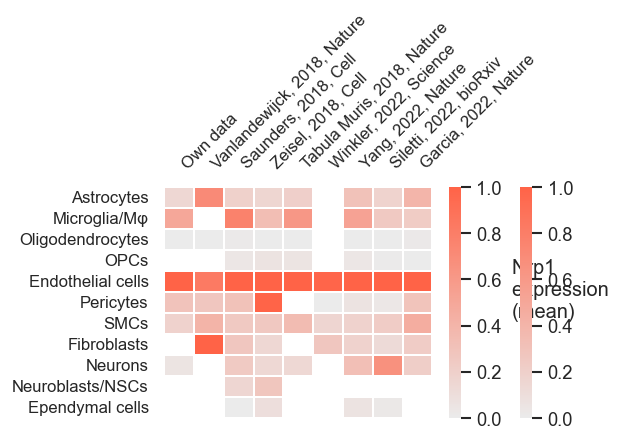

In [1038]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1039]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1040]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1041]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1042]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

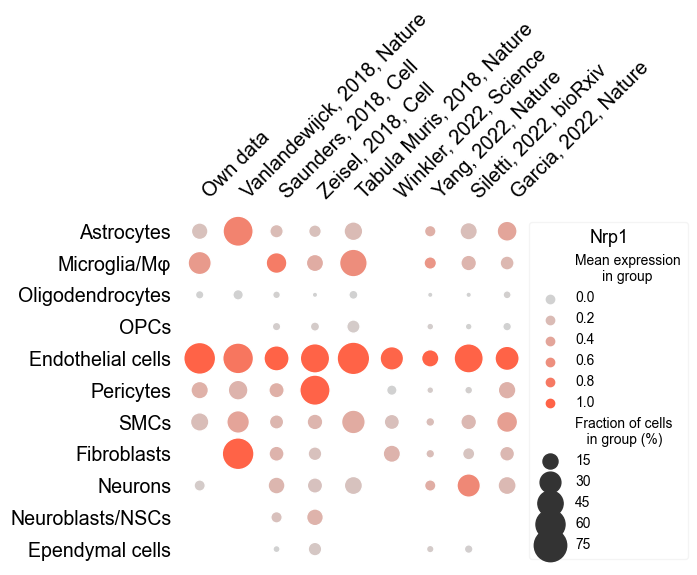

In [1043]:
plt.show()

In [1044]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1045]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1046]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Nrp1_Vanlandewijck2018_incl_zonation.csv',
 '20240122_NRP1_Yang2022_incl_zonation_normalized.csv',
 '20240122_NRP1_Winkler2022_incl_zonation_normalized.csv']

In [1047]:
os.path.join(path,filename)

'/Volumes/BD-Dichgans/SF/P06_Foxf2_per_celltype/Other_genes_summarized/incl_zonation/20240122_NRP1_Garcia2022_normalized.csv'

In [1048]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1049]:
all.gene.unique()

array(['Nrp1', 'NRP1'], dtype=object)

In [1050]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [1051]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1052]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1053]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1054]:
all = all.replace("ECs_Arterial","aECs")

In [1055]:
all = all.replace("ECs_Capillary","capECs")

In [1056]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1057]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [1058]:
all = all.replace("Microglia","Microglia/Mφ")

In [1059]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1060]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1061]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1062]:
all2 = all

#### Set order of axes

In [1063]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1064]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022'], dtype=object)

In [1065]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1066]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1067]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1068]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1069]:
all2 = all2.replace("Heindl2022","Own data")

In [1070]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1071]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1072]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1073]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1074]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1075]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1076]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1077]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1078]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1079]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


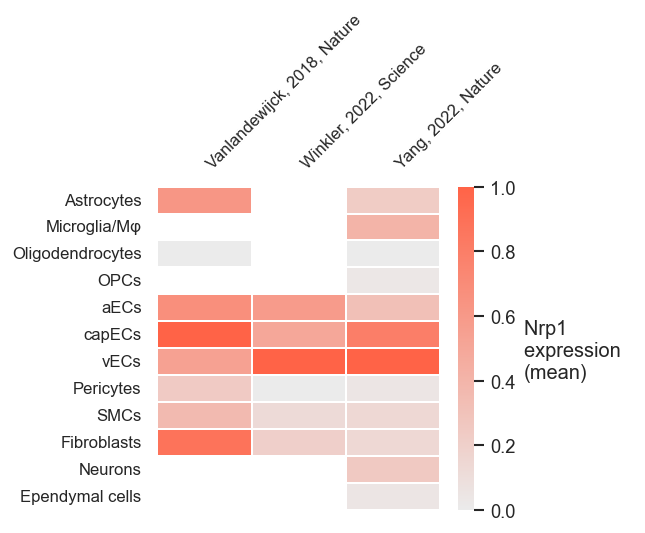

In [1080]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1081]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1082]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1083]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1084]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

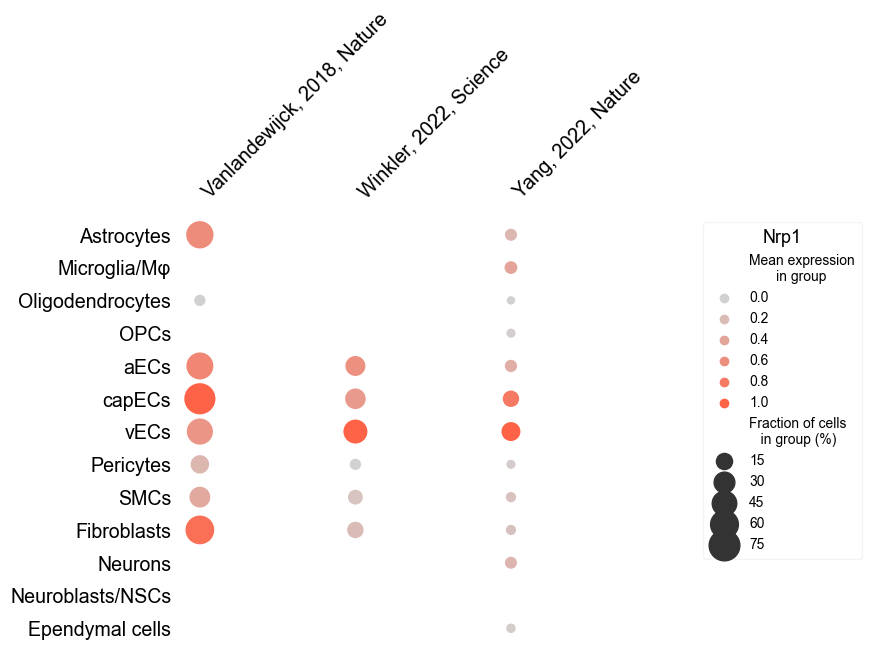

In [1085]:
plt.show()

In [1086]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1087]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Nrp2

In [1153]:
gene="Nrp2"

## Load data

In [1154]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Nrp2_Heindl2022_normalized.csv',
 '20240122_Nrp2_Vanlandewijck2018.csv',
 '20240122_NRP2_Yang2022_normalized.csv',
 '20240122_Nrp2_Saunders2018_normalized.csv',
 '20240122_Nrp2_Zeisel2018_normalized.csv',
 '20240122_NRP2_Winkler2022_normalized.csv',
 '20240122_Nrp2_TabulaMuris2018_normalized.csv',
 '20240122_NRP2_Garcia2022_normalized.csv',
 '20240122_NRP2_Siletti2022_normalized.csv']

In [1155]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1156]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [1157]:
all.gene.unique()

array(['Nrp2', 'NRP2'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [1158]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1159]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1160]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Microglia                1
Macrophages              1
Name: clusters, dtype: int64

In [1161]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1162]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1163]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Microglia',
 'Macrophages']

In [1164]:
all = all.replace("Microglia","Microglia/Mφ")

In [1165]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1166]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1167]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1168]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1169]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1170]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1171]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1172]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1173]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1174]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells  gene        source  \
31  Neuroblasts/NSCs              1.0           0.113024  Nrp2  Saunders2018   
43  Neuroblasts/NSCs              1.0           0.140688  Nrp2    Zeisel2018   

   organism  cell_number  
31    Mouse         4008  
43    Mouse         5466

### Rename ECs

In [1175]:
# rename ECs to Endothelial cells

In [1176]:
all2 = all

In [1177]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1178]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [1179]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1180]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1181]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1182]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1183]:
all2 = all2.replace("Heindl2022","Own data")

In [1184]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1185]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1186]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1187]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1188]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1189]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1190]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1191]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1192]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1193]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


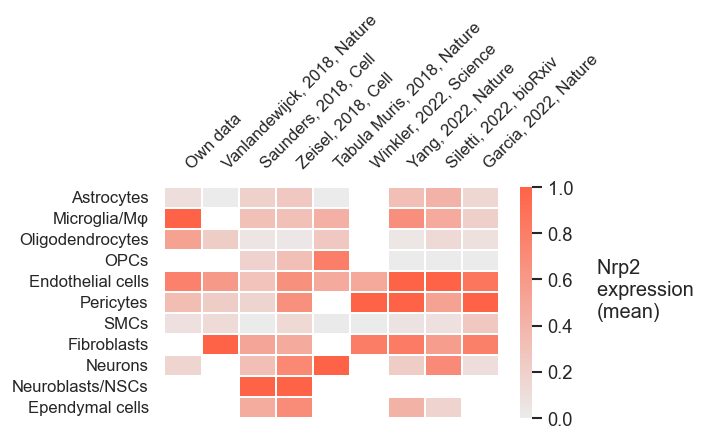

In [1194]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1195]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1196]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1197]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1198]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

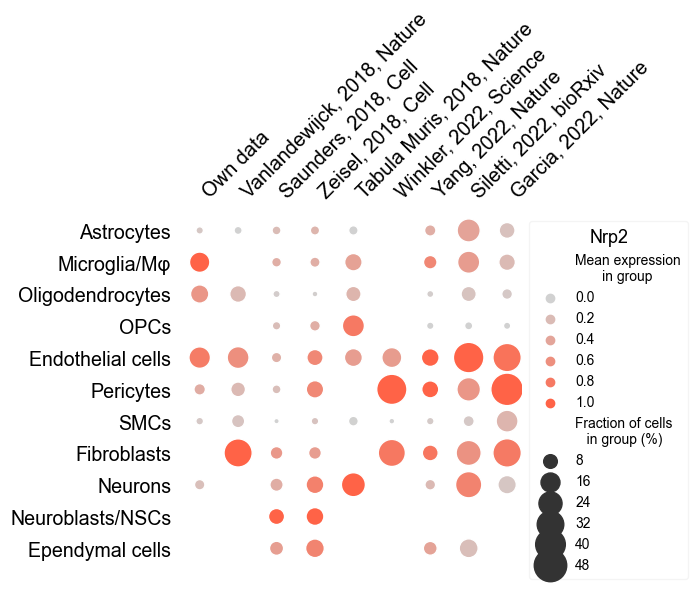

In [1199]:
plt.show()

In [1200]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1201]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1202]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Nrp2_Vanlandewijck2018_incl_zonation.csv',
 '20240122_NRP2_Yang2022_incl_zonation_normalized.csv',
 '20240122_NRP2_Winkler2022_incl_zonation_normalized.csv']

In [1220]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1221]:
all.source.unique()

array(['Vanlandewijck2018', 'Yang2022'], dtype=object)

In [1222]:
all.gene.unique()

array(['Nrp2', 'NRP2'], dtype=object)

In [1223]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells']

### Format

#### Remove celltypes

In [1224]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1225]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1226]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1227]:
all = all.replace("ECs_Arterial","aECs")

In [1228]:
all = all.replace("ECs_Capillary","capECs")

In [1229]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1230]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [1231]:
all = all.replace("Microglia","Microglia/Mφ")

In [1232]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1233]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1234]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1235]:
all2 = all

#### Set order of axes

In [1236]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1237]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022'], dtype=object)

In [1238]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1239]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1240]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1241]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1242]:
all2 = all2.replace("Heindl2022","Own data")

In [1243]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1244]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1245]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1246]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1247]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1248]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1249]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1250]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1251]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1252]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


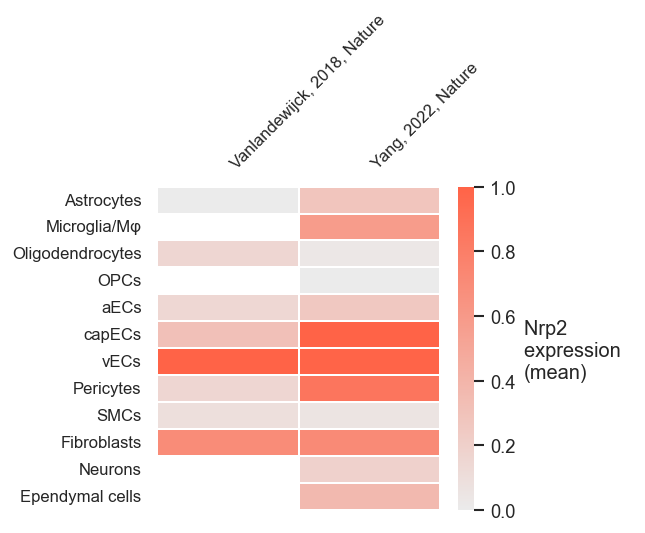

In [1253]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1254]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1255]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1256]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1257]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

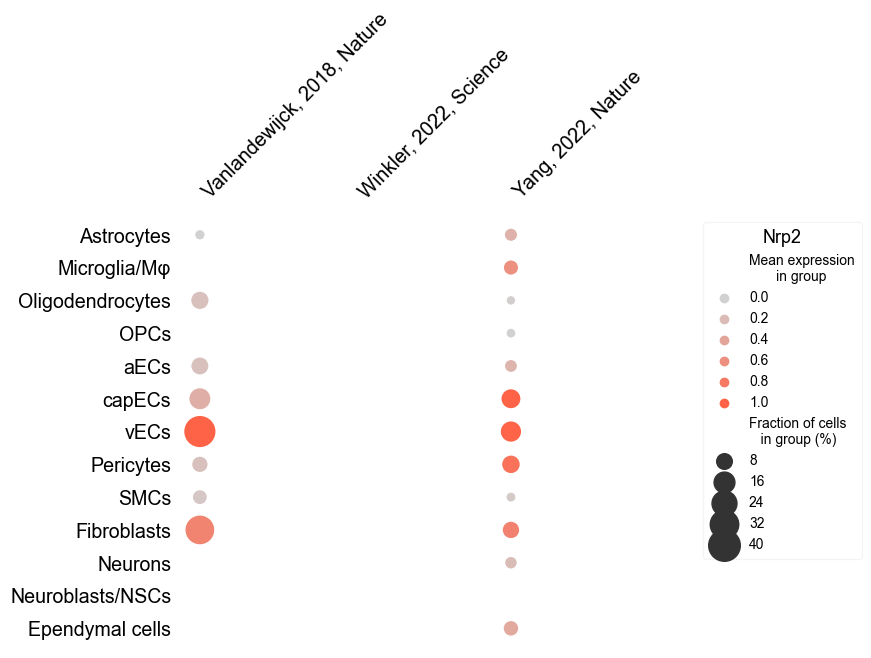

In [1258]:
plt.show()

In [1259]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1260]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Efnb2

In [1261]:
gene="Efnb2"

## Load data

In [1262]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Efnb2_Heindl2022_normalized.csv',
 '20240122_Efnb2_Vanlandewijck2018.csv',
 '20240122_EFNB2_Yang2022_normalized.csv',
 '20240122_Efnb2_Saunders2018_normalized.csv',
 '20240122_Efnb2_Zeisel2018_normalized.csv',
 '20240122_EFNB2_Winkler2022_normalized.csv',
 '20240122_Efnb2_TabulaMuris2018_normalized.csv',
 '20240122_EFNB2_Garcia2022_normalized.csv',
 '20240122_EFNB2_Siletti2022_normalized.csv']

In [1263]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1264]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [1265]:
all.gene.unique()

array(['Efnb2', 'EFNB2'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [1266]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1267]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1268]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Microglia                1
Macrophages              1
Name: clusters, dtype: int64

In [1269]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1270]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1271]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Microglia',
 'Macrophages']

In [1272]:
all = all.replace("Microglia","Microglia/Mφ")

In [1273]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1274]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1275]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1276]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1277]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1278]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1279]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1280]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1281]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1282]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
31  Neuroblasts/NSCs         0.670488           0.052146  Efnb2  Saunders2018   
43  Neuroblasts/NSCs         0.530179           0.047933  Efnb2    Zeisel2018   

   organism  cell_number  
31    Mouse         4008  
43    Mouse         5466

### Rename ECs

In [1283]:
# rename ECs to Endothelial cells

In [1284]:
all2 = all

In [1285]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1286]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [1287]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1288]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1289]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1290]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1291]:
all2 = all2.replace("Heindl2022","Own data")

In [1292]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1293]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1294]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1295]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1296]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1297]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1298]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1299]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1300]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1301]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


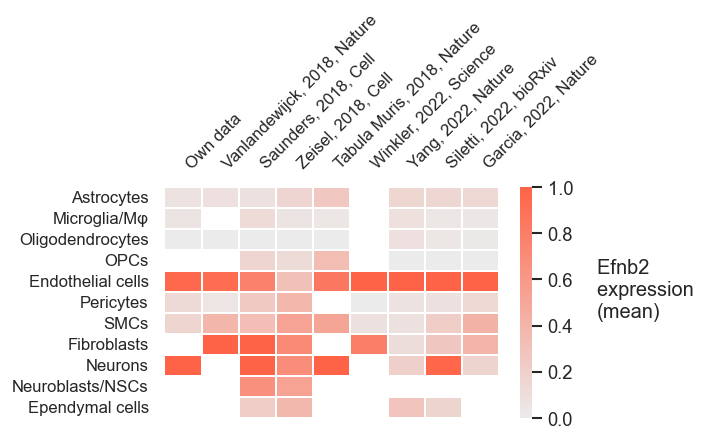

In [1302]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1303]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1304]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1305]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1306]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

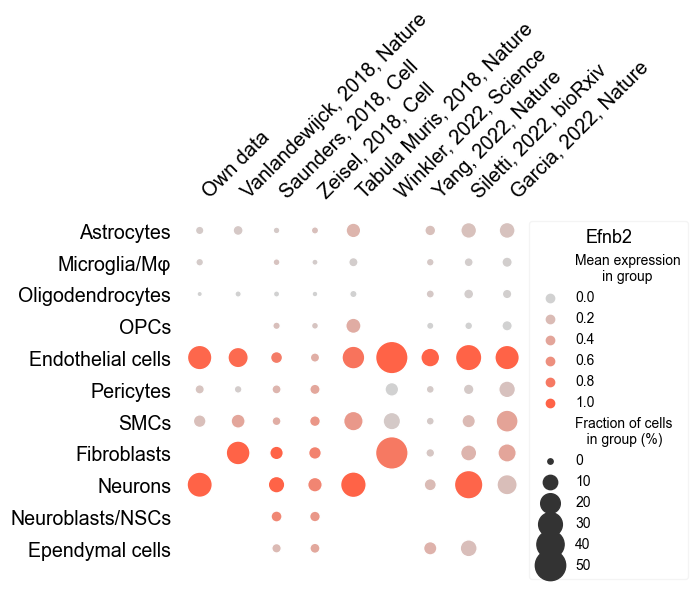

In [1307]:
plt.show()

In [1308]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1309]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1332]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Efnb2_Vanlandewijck2018_incl_zonation.csv',
 '20240122_EFNB2_Yang2022_incl_zonation_normalized.csv',
 '20240122_EFNB2_Winkler2022_incl_zonation_normalized.csv']

In [1333]:
li = []

for filename in matching_files[0:2]:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1334]:
all.gene.unique()

array(['Efnb2', 'EFNB2'], dtype=object)

In [1335]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells']

### Format

#### Remove celltypes

In [1336]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1337]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1338]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1339]:
all = all.replace("ECs_Arterial","aECs")

In [1340]:
all = all.replace("ECs_Capillary","capECs")

In [1341]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1342]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [1343]:
all = all.replace("Microglia","Microglia/Mφ")

In [1344]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1345]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1346]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1347]:
all2 = all

#### Set order of axes

In [1348]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1349]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022'], dtype=object)

In [1350]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1351]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1352]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1353]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1354]:
all2 = all2.replace("Heindl2022","Own data")

In [1355]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1356]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1357]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1358]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1359]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1360]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1361]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1362]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1363]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1364]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


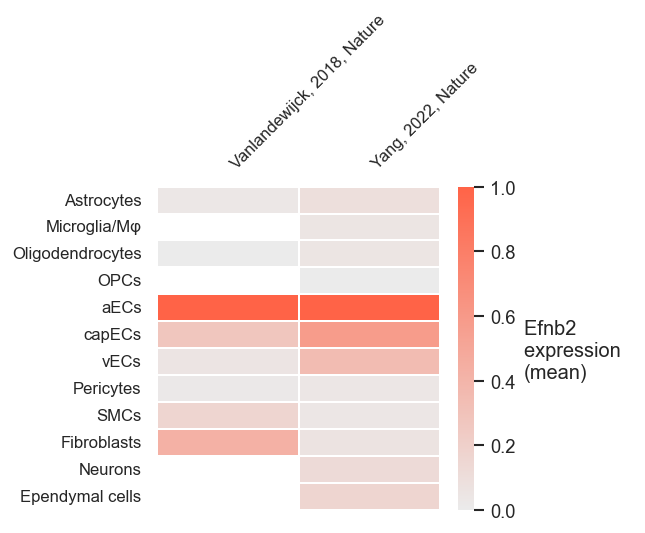

In [1365]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1366]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1367]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1368]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1369]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

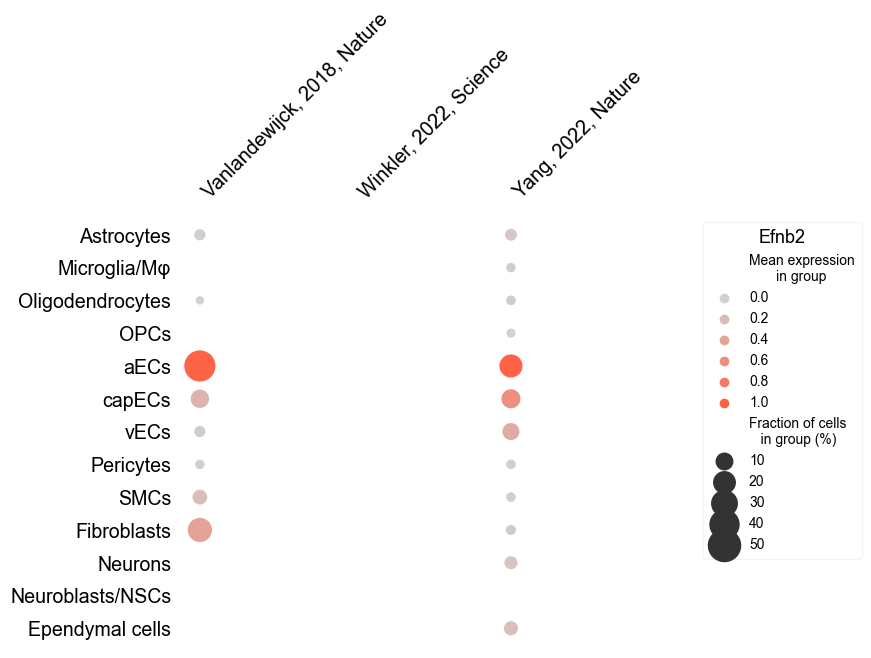

In [1370]:
plt.show()

In [1371]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1372]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Itgb1

In [1374]:
gene="Itgb1"

## Load data

In [1375]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Itgb1_Heindl2022_normalized.csv',
 '20240122_Itgb1_Vanlandewijck2018.csv',
 '20240122_ITGB1_Yang2022_normalized.csv',
 '20240122_Itgb1_Saunders2018_normalized.csv',
 '20240122_Itgb1_Zeisel2018_normalized.csv',
 '20240122_ITGB1_Winkler2022_normalized.csv',
 '20240122_Itgb1_TabulaMuris2018_normalized.csv',
 '20240122_ITGB1_Garcia2022_normalized.csv',
 '20240122_ITGB1_Siletti2022_normalized.csv']

In [1376]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1377]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [1378]:
all.gene.unique()

array(['Itgb1', 'ITGB1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [1379]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1380]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1381]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Microglia                1
Macrophages              1
Name: clusters, dtype: int64

In [1382]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1383]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1384]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Microglia',
 'Macrophages']

In [1385]:
all = all.replace("Microglia","Microglia/Mφ")

In [1386]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1387]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1388]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1389]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1390]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1391]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1392]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1393]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1394]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1395]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells   gene        source  \
31  Neuroblasts/NSCs         0.073301           0.134232  Itgb1  Saunders2018   
43  Neuroblasts/NSCs         0.016812           0.064947  Itgb1    Zeisel2018   

   organism  cell_number  
31    Mouse         4008  
43    Mouse         5466

### Rename ECs

In [1396]:
# rename ECs to Endothelial cells

In [1397]:
all2 = all

In [1398]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1399]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [1400]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1401]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1402]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1403]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1404]:
all2 = all2.replace("Heindl2022","Own data")

In [1405]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1406]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1407]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1408]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1409]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1410]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1411]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1412]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1413]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1414]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


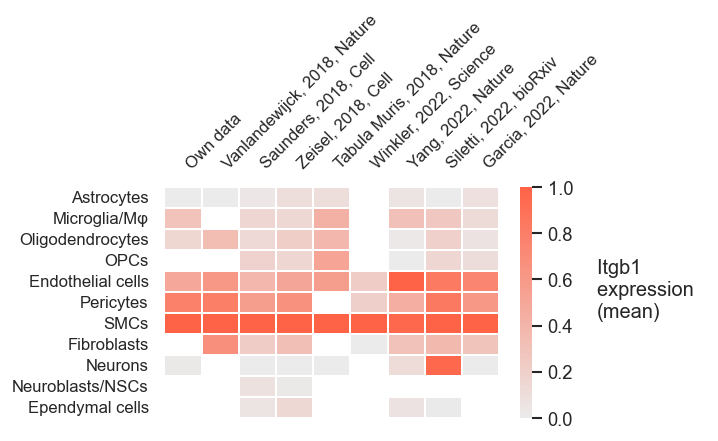

In [1415]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1416]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1417]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1418]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1419]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

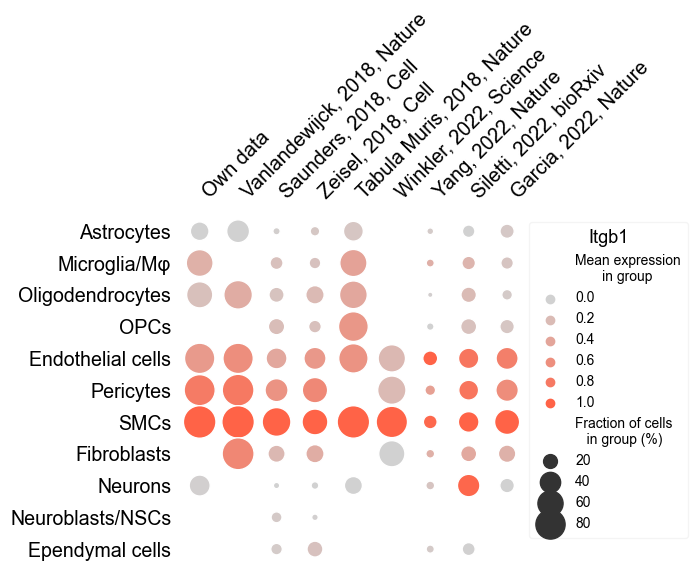

In [1420]:
plt.show()

In [1421]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1422]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1423]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Itgb1_Vanlandewijck2018_incl_zonation.csv',
 '20240122_ITGB1_Yang2022_incl_zonation_normalized.csv',
 '20240122_ITGB1_Winkler2022_incl_zonation_normalized.csv']

In [1424]:
os.path.join(path,filename)

'/Volumes/BD-Dichgans/SF/P06_Foxf2_per_celltype/Other_genes_summarized/incl_zonation/20240122_ITGB1_Siletti2022_normalized.csv'

In [1425]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1426]:
all.gene.unique()

array(['Itgb1', 'ITGB1'], dtype=object)

In [1427]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [1428]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1429]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1430]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1431]:
all = all.replace("ECs_Arterial","aECs")

In [1432]:
all = all.replace("ECs_Capillary","capECs")

In [1433]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1434]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [1435]:
all = all.replace("Microglia","Microglia/Mφ")

In [1436]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1437]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1438]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1439]:
all2 = all

#### Set order of axes

In [1440]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1441]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022'], dtype=object)

In [1442]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1443]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1444]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1445]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1446]:
all2 = all2.replace("Heindl2022","Own data")

In [1447]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1448]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1449]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1450]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1451]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1452]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1453]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1454]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1455]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1456]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


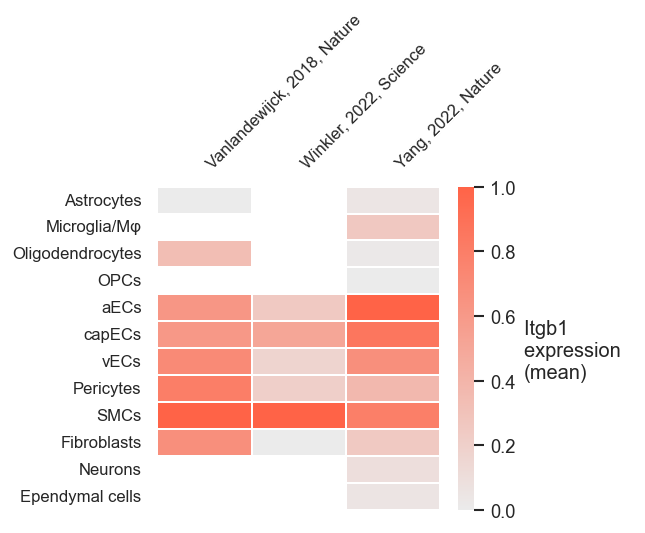

In [1457]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1458]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1459]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1460]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1461]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

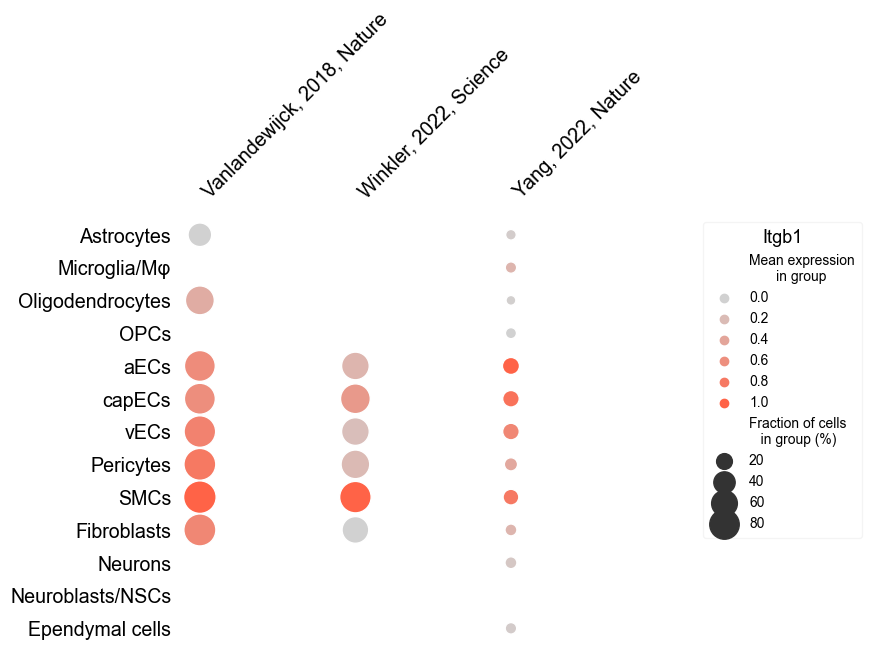

In [1462]:
plt.show()

In [1463]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1464]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Angpt2

In [1478]:
gene="Angpt2"

## Load data

In [1479]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Angpt2_Heindl2022_normalized.csv',
 '20240122_Angpt2_Vanlandewijck2018.csv',
 '20240122_ANGPT2_Yang2022_normalized.csv',
 '20240122_Angpt2_Saunders2018_normalized.csv',
 '20240122_Angpt2_Zeisel2018_normalized.csv',
 '20240122_ANGPT2_Winkler2022_normalized.csv',
 '20240122_Angpt2_TabulaMuris2018_normalized.csv',
 '20240122_ANGPT2_Garcia2022_normalized.csv',
 '20240122_ANGPT2_Siletti2022_normalized.csv']

In [1480]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1481]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Saunders2018',
       'Zeisel2018', 'Winkler2022', 'TabulaMuris2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [1482]:
all.gene.unique()

array(['Angpt2', 'ANGPT2'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [1483]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1484]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1485]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Endothelial cells        5
Microglia/Macrophages    5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Microglia                1
Macrophages              1
Name: clusters, dtype: int64

In [1486]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1487]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1488]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Microglia',
 'Macrophages']

In [1489]:
all = all.replace("Microglia","Microglia/Mφ")

In [1490]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1491]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1492]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1493]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1494]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1495]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1496]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1497]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1498]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1499]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells    gene  \
31  Neuroblasts/NSCs         0.000000           0.000250  Angpt2   
43  Neuroblasts/NSCs         0.005772           0.001464  Angpt2   

          source organism  cell_number  
31  Saunders2018    Mouse         4008  
43    Zeisel2018    Mouse         5466

### Rename ECs

In [1500]:
# rename ECs to Endothelial cells

In [1501]:
all2 = all

In [1502]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1503]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [1504]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1505]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1506]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1507]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1508]:
all2 = all2.replace("Heindl2022","Own data")

In [1509]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1510]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1511]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1512]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1513]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1514]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1515]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1516]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1517]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1518]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


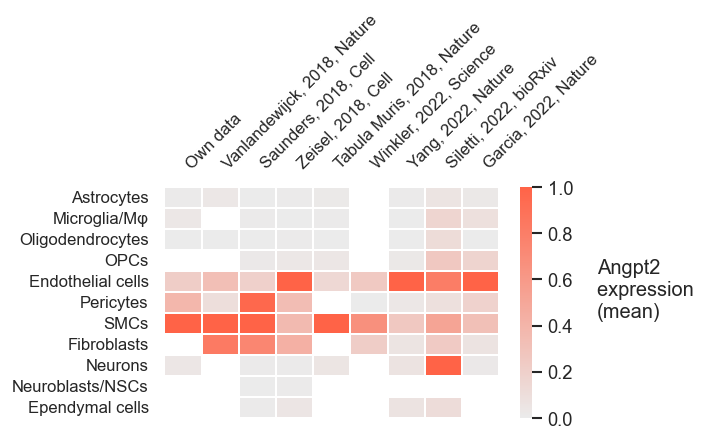

In [1519]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1520]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1521]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1522]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1523]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

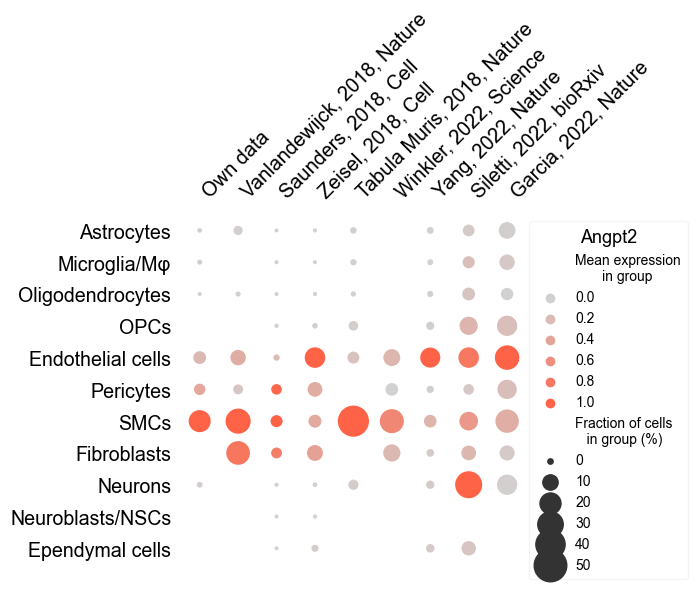

In [1524]:
plt.show()

In [1525]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1526]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1527]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_Angpt2_Vanlandewijck2018_incl_zonation.csv',
 '20240122_ANGPT2_Yang2022_incl_zonation_normalized.csv',
 '20240122_ANGPT2_Winkler2022_incl_zonation_normalized.csv']

In [1528]:
os.path.join(path,filename)

'/Volumes/BD-Dichgans/SF/P06_Foxf2_per_celltype/Other_genes_summarized/incl_zonation/20240122_ANGPT2_Siletti2022_normalized.csv'

In [1529]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1530]:
all.gene.unique()

array(['Angpt2', 'ANGPT2'], dtype=object)

In [1531]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [1532]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1533]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1534]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1535]:
all = all.replace("ECs_Arterial","aECs")

In [1536]:
all = all.replace("ECs_Capillary","capECs")

In [1537]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1538]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs']

In [1539]:
all = all.replace("Microglia","Microglia/Mφ")

In [1540]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1541]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1542]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1543]:
all2 = all

#### Set order of axes

In [1544]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [1545]:
all2.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022'], dtype=object)

In [1546]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1547]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1548]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1549]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1550]:
all2 = all2.replace("Heindl2022","Own data")

In [1551]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1552]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1553]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1554]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1555]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1556]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1557]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1558]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1559]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1560]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


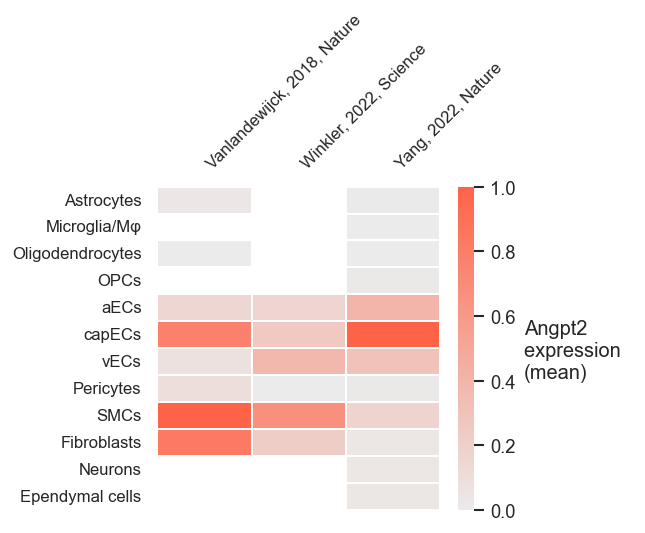

In [1561]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1562]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1563]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1564]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1565]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

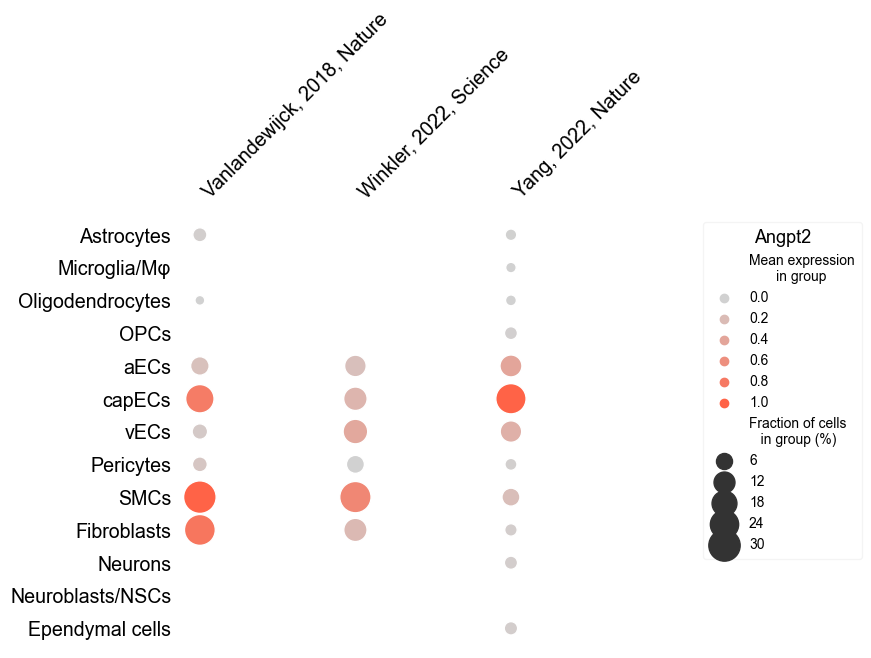

In [1566]:
plt.show()

In [1567]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1568]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Cdh5

In [1569]:
gene="Cdh5"

## Load data

In [1570]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_CDH5_Yang2022_normalized.csv',
 '20240122_Cdh5_Vanlandewijck2018.csv',
 '20240122_Cdh5_Saunders2018_normalized.csv',
 '20240122_Cdh5_Heindl2022_normalized.csv',
 '20240122_CDH5_Winkler2022_normalized.csv',
 '20240122_Cdh5_Zeisel2018_normalized.csv',
 '20240122_Cdh5_TabulaMuris2018_normalized.csv',
 '20240122_CDH5_Garcia2022_normalized.csv',
 '20240122_CDH5_Siletti2022_normalized.csv']

In [1571]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1572]:
all.source.unique()

array(['Yang2022', 'Vanlandewijck2018', 'Saunders2018', 'Heindl2022',
       'Winkler2022', 'Zeisel2018', 'TabulaMuris2018', 'Garcia2022',
       'Siletti2022'], dtype=object)

In [1573]:
all.gene.unique()

array(['CDH5', 'Cdh5'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [1574]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [1575]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

In [1576]:
all.clusters.value_counts()

SMCs                     9
Astrocytes               8
Oligos                   8
Pericytes                8
Neurons                  7
Fibroblasts              6
OPCs                     6
Microglia/Macrophages    5
Endothelial cells        5
ECs                      4
Ependymal cells          4
Neurogenesis             1
Neuroblasts              1
Leptomeningeal cells     1
Microglia                1
Macrophages              1
Name: clusters, dtype: int64

In [1577]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters           Astrocytes  ECs  Endothelial cells  Ependymal cells  \
source                                                                   
Garcia2022                  1    1                  0                0   
Heindl2022                  1    0                  1                0   
Saunders2018                1    0                  1                1   
Siletti2022                 1    0                  1                1   
TabulaMuris2018             1    0                  1                0   
Vanlandewijck2018           1    1                  0                0   
Winkler2022                 0    1                  0                0   
Yang2022                    1    1                  0                1   
Zeisel2018                  1    0                  1                1   

clusters           Fibroblasts  Leptomeningeal cells  Macrophages  Microglia  \
source                                                                         
Garcia2022                   1                     0            0          1   
Heindl2022                   0                     0            0          0   
Saunders2018                 1                     0            0          0   
Siletti2022                  1                     0            1          0   
TabulaMuris2018              0                     0            0          0   
Vanlandewijck2018            1                     0            0          0   
Winkler2022                  1                     0            0          0   
Yang2022                     1                     0            0          0   
Zeisel2018                   0                     1            0          0   

clusters           Microglia/Macrophages  Neuroblasts  Neurogenesis  Neurons  \
source                                                                         
Garcia2022                             0            0             0        1   
Heindl2022                             1            0             0        1   
Saunders2018                           1            0             1        1   
Siletti2022                            0            0             0        1   
TabulaMuris2018                        1            0             0        1   
Vanlandewijck2018                      0            0             0        0   
Winkler2022                            0            0             0        0   
Yang2022                               1            0             0        1   
Zeisel2018                             1            1             0        1   

clusters           OPCs  Oligos  Pericytes  SMCs  
source                                            
Garcia2022            1       1          1     1  
Heindl2022            0       1          1     1  
Saunders2018          1       1          1     1  
Siletti2022           1       1          1     1  
TabulaMuris2018       1       1          0     1  
Vanlandewijck2018     0       1          1     1  
Winkler2022           0       0          1     1  
Yang2022              1       1          1     1  
Zeisel2018            1       1          1     1

### Rename Oligos

In [1578]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [1579]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Endothelial cells',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Microglia',
 'Macrophages']

In [1580]:
all = all.replace("Microglia","Microglia/Mφ")

In [1581]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1582]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1583]:
all.clusters.unique().tolist()

['Astrocytes',
 'ECs',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Endothelial cells',
 'Neurogenesis',
 'Neuroblasts',
 'Leptomeningeal cells']

### SMCs/Pericytes

In [1584]:
all[all.clusters=="SMCs/Pericytes"]

Empty DataFrame
Columns: [clusters, mean_expression, fraction_of_cells, gene, source, organism, cell_number]
Index: []

In [1585]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [1586]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [1587]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [1588]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [1589]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [1590]:
all[all.clusters=="Neuroblasts/NSCs"]

clusters  mean_expression  fraction_of_cells  gene        source  \
22  Neuroblasts/NSCs              0.0                0.0  Cdh5  Saunders2018   
48  Neuroblasts/NSCs              0.0                0.0  Cdh5    Zeisel2018   

   organism  cell_number  
22    Mouse         4008  
48    Mouse         5466

### Rename ECs

In [1591]:
# rename ECs to Endothelial cells

In [1592]:
all2 = all

In [1593]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [1594]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Neuroblasts/NSCs']

In [1595]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [1596]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1597]:
all2 = all2.sort_values("clusters")

### Rename studies

In [1598]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1599]:
all2 = all2.replace("Heindl2022","Own data")

In [1600]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1601]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1602]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1603]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1604]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1605]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1606]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1607]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [1608]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [1609]:
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4097029831.py:2: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


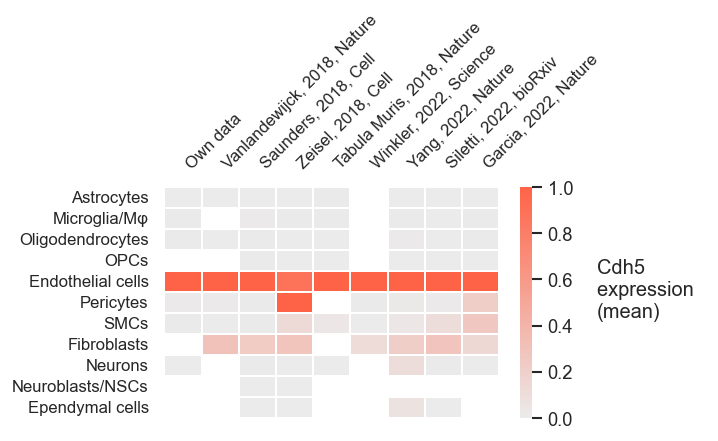

In [1610]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [1611]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1612]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1613]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1614]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

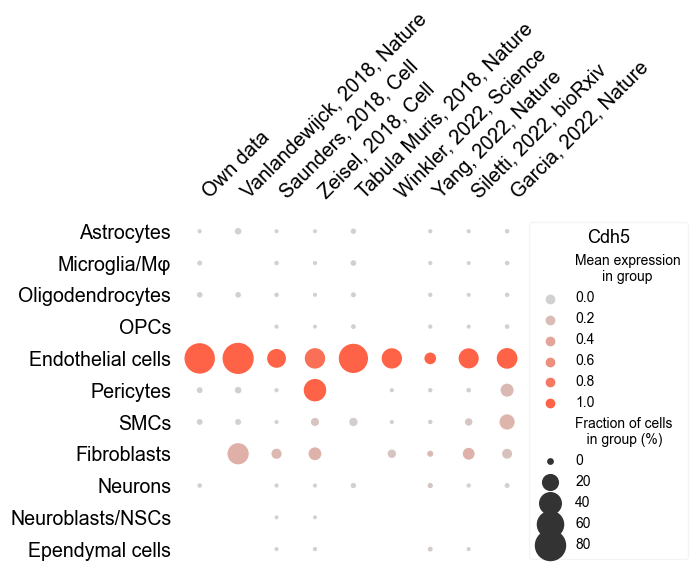

In [1615]:
plt.show()

In [1616]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [1617]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [1618]:
path = os.path.join(main_dir, 'P06_Foxf2_per_celltype', 'Other_genes_summarized', 'incl_zonation')
all_files = os.listdir(path)
matching_files = [file for file in all_files if gene.lower() in file.lower() and file.endswith(".csv")]
matching_files

['20240122_CDH5_Yang2022_incl_zonation_normalized.csv',
 '20240122_Cdh5_Vanlandewijck2018_incl_zonation.csv',
 '20240122_CDH5_Winkler2022_incl_zonation_normalized.csv']

In [1619]:
os.path.join(path,filename)

'/Volumes/BD-Dichgans/SF/P06_Foxf2_per_celltype/Other_genes_summarized/incl_zonation/20240122_CDH5_Siletti2022_normalized.csv'

In [1620]:
li = []

for filename in matching_files:
    df = pd.read_csv(os.path.join(path,filename), index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [1621]:
all.gene.unique()

array(['CDH5', 'Cdh5'], dtype=object)

In [1622]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'Pericytes',
 'SMCs',
 'T cells',
 'ECs_non_AV',
 'Fibromyocytes']

### Format

#### Remove celltypes

In [1623]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [1624]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [1625]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [1626]:
all = all.replace("ECs_Arterial","aECs")

In [1627]:
all = all.replace("ECs_Capillary","capECs")

In [1628]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [1629]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs']

In [1630]:
all = all.replace("Microglia","Microglia/Mφ")

In [1631]:
all = all.replace("Macrophages","Microglia/Mφ")

In [1632]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [1633]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs']

In [1634]:
all2 = all

#### Set order of axes

In [1635]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Ependymal cells',
 'Fibroblasts',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs']

In [1636]:
all2.source.unique()

array(['Yang2022', 'Vanlandewijck2018', 'Winkler2022'], dtype=object)

In [1637]:
#all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022"])

In [1638]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [1639]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [1640]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [1641]:
all2 = all2.replace("Heindl2022","Own data")

In [1642]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [1643]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [1644]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [1645]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [1646]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [1647]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [1648]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [1649]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [1650]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [1651]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/1865183444.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


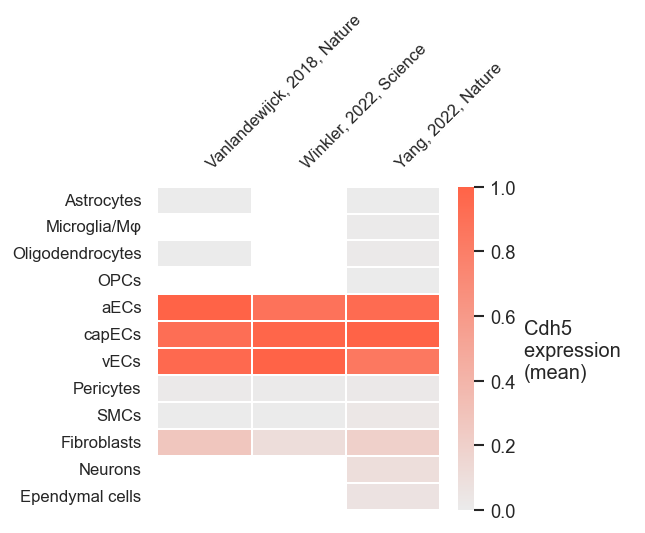

In [1652]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [1653]:
# create color palette
mycolormap = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1', 'tomato'])
mpl.colormaps.register(mycolormap, force = True)
cpal = sns.color_palette("mycolormap", as_cmap=True)

/var/folders/8v/lcvg2wdd2ll8p7lhpn57pz8c0000gn/T/ipykernel_20243/4235366026.py:3: UserWarning: Overwriting the cmap '' that was already in the registry.
  mpl.colormaps.register(mycolormap, force = True)


In [1654]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [1655]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [1656]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=mycolormap, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

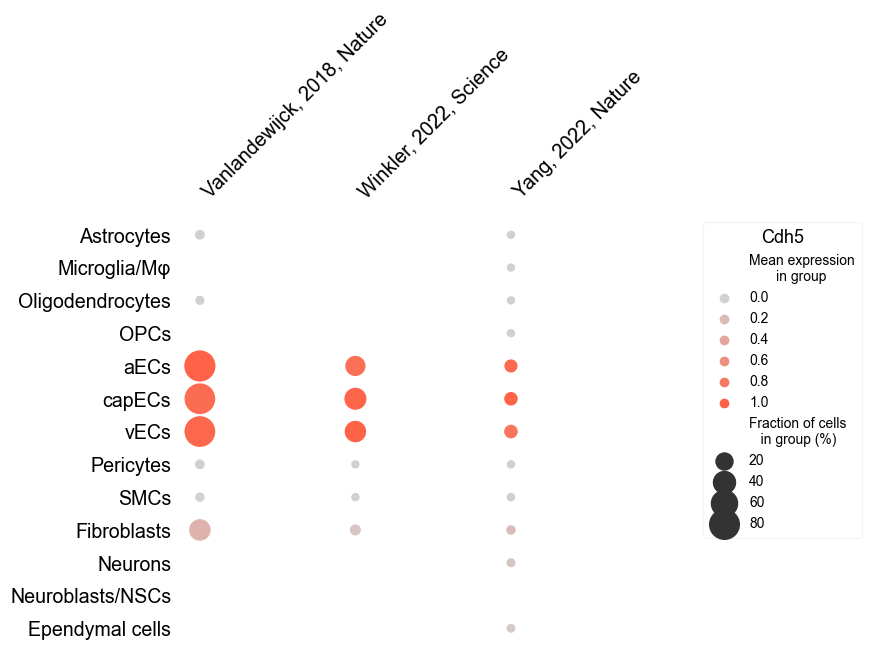

In [1657]:
plt.show()

In [1658]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [1659]:
pl.savefig(main_dir+'//P06_Foxf2_per_celltype//plots//'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Session Info

In [1660]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                         9.4.0
anyio                       NA
appnope                     0.1.2
arrow                       1.2.3
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
brotli                      NA
certifi                     2022.12.07
cffi                        1.15.1
chardet                     5.2.0
charset_normalizer          2.0.4
cloudpickle                 2.2.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dask                        2023.2.1
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing 

# Outdated code

### Merge EC zonation

Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [1466]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [1467]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [1468]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [1469]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [1470]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [1471]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [1472]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [1473]:
# remove original rows, then append new ones

In [1474]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [1475]:
# compute new rows via weighted mean

In [1476]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [394]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [395]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [396]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [397]:
# complement missing celltypes as NA rows

In [398]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))

---
# Export HTML

In [ ]:
# Use nbconvert conda env
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb